In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import pandas as pd

In [2]:
def filter_non_digits(string):
    result = ''
    for char in string:
        if char in '1234567890':
            result += char
    return result 

In [24]:
def remove_low(f):
    song, sr = librosa.load(f)
    D = np.abs(librosa.stft(song))
    #FIND OUT HOW MANY FREQUENCIES WE REMOVED HERE! About 10.7*64, 10.7 is the value of librosa.fft_frequencies()[1] 
    D=D[64:]
    DB = librosa.amplitude_to_db(D, ref=np.max)
    #if DB.shape[1] > 200:
    #    DB = DB[:, :200]
    return DB

def remove_talking_and_low(f):
    chirp_song, sr = librosa.load(f)
    split=librosa.effects.split(chirp_song, top_db=60)
    chirp_song_split=chirp_song[split[1,0]:split[1,1]]
    if chirp_song_split.shape[0] > 220500:
        chirp_song_split = chirp_song_split[:220500]
    D = np.abs(librosa.stft(chirp_song_split))
    #FIND OUT HOW MANY FREQUENCIES WE REMOVED HERE!
    D=D[64:]
    DB = librosa.amplitude_to_db(D, ref=np.max)
    return DB

In [21]:
directory = 'E:\chirpfiles\\no_voice_files\\82059.wav' #'Small_audio_sample'
DB = remove_low(directory)
#plt.plot(DB)
#plt.show()
DB.shape

(961, 200)

In [4]:
def compute_var(DB):
    variance = np.zeros(DB.shape[0])
    for x in range(0,DB.shape[0]):
        variance[x] = np.var(DB[x,:])
    return variance

In [5]:
def main_freq_and_range(f, remove_talk, sound_range = .5):
    if remove_talk:
        variance = compute_var(remove_talking_and_low(f))
    else:
        variance = compute_var(remove_low(f))
    maxfreq = np.argmax(variance)
    maxvar = max(variance)
    if variance[maxfreq] != maxvar:
        print ('failed! at file ', f)
        return None

    #find range of frequencies around the max freq where the animal is loud 
    min_freq_range = 0
    max_freq_range = 0
    i=0
    bool_high =True
    bool_low = True
    while bool_high or bool_low:
        if bool_high:
            if maxfreq+i>len(variance)-1:
                max_freq_range = maxfreq+i
                bool_high = False
            elif variance[maxfreq+i] < sound_range*maxvar:
                #print ('max freq range =', (maxfreq+i+64)*librosa.fft_frequencies()[1])
                max_freq_range = maxfreq+i
                bool_high = False
        if bool_low:
            if maxfreq-i<0:
                min_freq_range = 0
                bool_low = False
            elif variance[maxfreq-i] < sound_range*maxvar:
                #print ('min freq range =', (maxfreq-i+64)*librosa.fft_frequencies()[1])
                min_freq_range = maxfreq-i
                bool_low = False
        i = i+1
    size = (max_freq_range+64)/(min_freq_range+64)
    return (maxfreq+64)*librosa.fft_frequencies()[1], size

In [6]:
def plot_specto(f):
    song,sr = librosa.load(f)
    hop_length = 1024
    n_fft = 2048
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

In [7]:
def get_freq_and_range(directory, remove_talk = False, plot = False, sound_range=.5):
    df = pd.read_csv('MLNS_Insects_fams_05212024.csv')
    out = pd.DataFrame(columns = ['critter_name','main_frequency','range'])
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            #recover type
            file_name = float(filter_non_digits(f))
            critter_name = df.loc[df.cat_num==file_name].critter_name
            print (critter_name)
            
            #recover main freq and range
            freq, rang = main_freq_and_range(f, remove_talk, sound_range = sound_range)
            new_row = pd.DataFrame({'critter_name': critter_name, 'main_frequency': freq, 'range': rang})
            out = pd.concat([out, new_row])
    return out

def sanity_check(directory, plot = False, remove_talk = False, sound_range = .5):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            #recover main freq and range
            print (main_freq_and_range(f,remove_talk, sound_range = sound_range))
            plot_specto(f)
    return out

321    cicada
Name: critter_name, dtype: object
322    cicada
Name: critter_name, dtype: object
323    cicada
Name: critter_name, dtype: object
324    cicada
Name: critter_name, dtype: object
327    cicada
Name: critter_name, dtype: object
332    cricket
Name: critter_name, dtype: object
333    kaydid
Name: critter_name, dtype: object
334    kaydid
Name: critter_name, dtype: object
336    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


337    kaydid
Name: critter_name, dtype: object
339    cricket
Name: critter_name, dtype: object
340    cricket
Name: critter_name, dtype: object
342    cricket
Name: critter_name, dtype: object
350    kaydid
Name: critter_name, dtype: object
351    kaydid
Name: critter_name, dtype: object
354    cricket
Name: critter_name, dtype: object
355    cricket
Name: critter_name, dtype: object
359    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1250
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1680
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1814
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1208
  warnings.warn(


360    kaydid
Name: critter_name, dtype: object
361    kaydid
Name: critter_name, dtype: object
362    kaydid
Name: critter_name, dtype: object
363    cricket
Name: critter_name, dtype: object
365    kaydid
Name: critter_name, dtype: object
366    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1293
  warnings.warn(


376    kaydid
Name: critter_name, dtype: object
377    cricket
Name: critter_name, dtype: object
379    kaydid
Name: critter_name, dtype: object
381    kaydid
Name: critter_name, dtype: object
382    cicada
Name: critter_name, dtype: object
384    cricket
Name: critter_name, dtype: object
387    kaydid
Name: critter_name, dtype: object
388    kaydid
Name: critter_name, dtype: object
390    kaydid
Name: critter_name, dtype: object
391    kaydid
Name: critter_name, dtype: object
392    cricket
Name: critter_name, dtype: object
393    kaydid
Name: critter_name, dtype: object
394    kaydid
Name: critter_name, dtype: object
395    cricket
Name: critter_name, dtype: object
396    kaydid
Name: critter_name, dtype: object
397    kaydid
Name: critter_name, dtype: object
398    kaydid
Name: critter_name, dtype: object
401    kaydid
Name: critter_name, dtype: object
402    kaydid
Name: critter_name, dtype: object
404    kaydid
Name: critter_name, dtype: object
405    kaydid
Name: critter_name, dt

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


454    kaydid
Name: critter_name, dtype: object
455    kaydid
Name: critter_name, dtype: object
456    kaydid
Name: critter_name, dtype: object
457    kaydid
Name: critter_name, dtype: object
458    cricket
Name: critter_name, dtype: object
459    cricket
Name: critter_name, dtype: object
461    cricket
Name: critter_name, dtype: object
462    cricket
Name: critter_name, dtype: object
463    cricket
Name: critter_name, dtype: object
464    cricket
Name: critter_name, dtype: object
467    cricket
Name: critter_name, dtype: object
469    cricket
Name: critter_name, dtype: object
470    cricket
Name: critter_name, dtype: object
471    cricket
Name: critter_name, dtype: object
472    cricket
Name: critter_name, dtype: object
473    cricket
Name: critter_name, dtype: object
474    cricket
Name: critter_name, dtype: object
475    cricket
Name: critter_name, dtype: object
476    cricket
Name: critter_name, dtype: object
477    cricket
Name: critter_name, dtype: object
479    cricket
Name: cri

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


482    cricket
Name: critter_name, dtype: object
487    cricket
Name: critter_name, dtype: object
488    cricket
Name: critter_name, dtype: object
489    cricket
Name: critter_name, dtype: object
490    cricket
Name: critter_name, dtype: object
491    cricket
Name: critter_name, dtype: object
492    cricket
Name: critter_name, dtype: object
494    cricket
Name: critter_name, dtype: object
495    cricket
Name: critter_name, dtype: object
496    cricket
Name: critter_name, dtype: object
497    cricket
Name: critter_name, dtype: object
501    cricket
Name: critter_name, dtype: object
504    cricket
Name: critter_name, dtype: object
505    cricket
Name: critter_name, dtype: object
509    cricket
Name: critter_name, dtype: object
520    cricket
Name: critter_name, dtype: object
526    cricket
Name: critter_name, dtype: object
528    cricket
Name: critter_name, dtype: object
529    cricket
Name: critter_name, dtype: object
532    cricket
Name: critter_name, dtype: object
539    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


553    cricket
Name: critter_name, dtype: object
558    cricket
Name: critter_name, dtype: object
561    cricket
Name: critter_name, dtype: object
562    cricket
Name: critter_name, dtype: object
571    cricket
Name: critter_name, dtype: object
581    cricket
Name: critter_name, dtype: object
585    cricket
Name: critter_name, dtype: object
600    cricket
Name: critter_name, dtype: object
606    cricket
Name: critter_name, dtype: object
608    cricket
Name: critter_name, dtype: object
609    cricket
Name: critter_name, dtype: object
612    cricket
Name: critter_name, dtype: object
614    cricket
Name: critter_name, dtype: object
616    cricket
Name: critter_name, dtype: object
617    cricket
Name: critter_name, dtype: object
619    cricket
Name: critter_name, dtype: object
622    cricket
Name: critter_name, dtype: object
623    cricket
Name: critter_name, dtype: object
624    cricket
Name: critter_name, dtype: object
625    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


628    cricket
Name: critter_name, dtype: object
633    cricket
Name: critter_name, dtype: object
634    cricket
Name: critter_name, dtype: object
643    cricket
Name: critter_name, dtype: object
644    cricket
Name: critter_name, dtype: object
645    cricket
Name: critter_name, dtype: object
646    cricket
Name: critter_name, dtype: object
647    cricket
Name: critter_name, dtype: object
648    cricket
Name: critter_name, dtype: object
649    cricket
Name: critter_name, dtype: object
651    cricket
Name: critter_name, dtype: object
652    cricket
Name: critter_name, dtype: object
653    cricket
Name: critter_name, dtype: object
654    cricket
Name: critter_name, dtype: object
657    cricket
Name: critter_name, dtype: object
659    cricket
Name: critter_name, dtype: object
660    cricket
Name: critter_name, dtype: object
662    cricket
Name: critter_name, dtype: object
663    cricket
Name: critter_name, dtype: object
664    cricket
Name: critter_name, dtype: object
665    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


794    cricket
Name: critter_name, dtype: object
795    cricket
Name: critter_name, dtype: object
797    cricket
Name: critter_name, dtype: object
798    cricket
Name: critter_name, dtype: object
799    cricket
Name: critter_name, dtype: object
800    cricket
Name: critter_name, dtype: object
801    cricket
Name: critter_name, dtype: object
802    cricket
Name: critter_name, dtype: object
803    cricket
Name: critter_name, dtype: object
805    cricket
Name: critter_name, dtype: object
807    cricket
Name: critter_name, dtype: object
808    cricket
Name: critter_name, dtype: object
809    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


810    cricket
Name: critter_name, dtype: object
812    cricket
Name: critter_name, dtype: object
815    cricket
Name: critter_name, dtype: object
816    cricket
Name: critter_name, dtype: object
817    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


819    cricket
Name: critter_name, dtype: object
820    cricket
Name: critter_name, dtype: object
822    cricket
Name: critter_name, dtype: object
823    cricket
Name: critter_name, dtype: object
827    cricket
Name: critter_name, dtype: object
828    cricket
Name: critter_name, dtype: object
829    cricket
Name: critter_name, dtype: object
833    cricket
Name: critter_name, dtype: object
834    cricket
Name: critter_name, dtype: object
836    cricket
Name: critter_name, dtype: object
839    cricket
Name: critter_name, dtype: object
841    cricket
Name: critter_name, dtype: object
843    cricket
Name: critter_name, dtype: object
844    cricket
Name: critter_name, dtype: object
845    cricket
Name: critter_name, dtype: object
846    cricket
Name: critter_name, dtype: object
847    cricket
Name: critter_name, dtype: object
848    cricket
Name: critter_name, dtype: object
849    cricket
Name: critter_name, dtype: object
850    cricket
Name: critter_name, dtype: object
851    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


886    cricket
Name: critter_name, dtype: object
888    cricket
Name: critter_name, dtype: object
890    cricket
Name: critter_name, dtype: object
891    cricket
Name: critter_name, dtype: object
893    cricket
Name: critter_name, dtype: object
894    cricket
Name: critter_name, dtype: object
896    cricket
Name: critter_name, dtype: object
897    cricket
Name: critter_name, dtype: object
898    cricket
Name: critter_name, dtype: object
899    cricket
Name: critter_name, dtype: object
900    cricket
Name: critter_name, dtype: object
901    cricket
Name: critter_name, dtype: object
902    cricket
Name: critter_name, dtype: object
907    cricket
Name: critter_name, dtype: object
909    cricket
Name: critter_name, dtype: object
910    cricket
Name: critter_name, dtype: object
911    cricket
Name: critter_name, dtype: object
912    cricket
Name: critter_name, dtype: object
913    cricket
Name: critter_name, dtype: object
914    cricket
Name: critter_name, dtype: object
915    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


917    cricket
Name: critter_name, dtype: object
921    cricket
Name: critter_name, dtype: object
922    cricket
Name: critter_name, dtype: object
923    cricket
Name: critter_name, dtype: object
924    cricket
Name: critter_name, dtype: object
925    cricket
Name: critter_name, dtype: object
926    cricket
Name: critter_name, dtype: object
927    cricket
Name: critter_name, dtype: object
928    cricket
Name: critter_name, dtype: object
929    cricket
Name: critter_name, dtype: object
930    cricket
Name: critter_name, dtype: object
932    cricket
Name: critter_name, dtype: object
933    cricket
Name: critter_name, dtype: object
935    cricket
Name: critter_name, dtype: object
939    cricket
Name: critter_name, dtype: object
940    cricket
Name: critter_name, dtype: object
941    cricket
Name: critter_name, dtype: object
942    cricket
Name: critter_name, dtype: object
943    cricket
Name: critter_name, dtype: object
944    cricket
Name: critter_name, dtype: object
945    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


997    cricket
Name: critter_name, dtype: object
1009    cricket
Name: critter_name, dtype: object
1017    cricket
Name: critter_name, dtype: object
1019    cricket
Name: critter_name, dtype: object
1020    cricket
Name: critter_name, dtype: object
1022    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1025    cricket
Name: critter_name, dtype: object
1028    cricket
Name: critter_name, dtype: object
1030    cricket
Name: critter_name, dtype: object
1031    cricket
Name: critter_name, dtype: object
1035    cricket
Name: critter_name, dtype: object
1036    cricket
Name: critter_name, dtype: object
1040    kaydid
Name: critter_name, dtype: object
1041    cricket
Name: critter_name, dtype: object
1042    kaydid
Name: critter_name, dtype: object
1044    cricket
Name: critter_name, dtype: object
1045    cricket
Name: critter_name, dtype: object
1047    cricket
Name: critter_name, dtype: object
1048    cricket
Name: critter_name, dtype: object
1049    kaydid
Name: critter_name, dtype: object
1050    cricket
Name: critter_name, dtype: object
1052    cricket
Name: critter_name, dtype: object
1055    cricket
Name: critter_name, dtype: object
1056    cricket
Name: critter_name, dtype: object
1058    cricket
Name: critter_name, dtype: object
1059    cricket
Name: critter_name, dtype: object
106

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1166    cricket
Name: critter_name, dtype: object
1167    cricket
Name: critter_name, dtype: object
1168    cricket
Name: critter_name, dtype: object
1169    cricket
Name: critter_name, dtype: object
1170    cricket
Name: critter_name, dtype: object
1171    cricket
Name: critter_name, dtype: object
1172    cricket
Name: critter_name, dtype: object
1173    cricket
Name: critter_name, dtype: object
1174    cricket
Name: critter_name, dtype: object
1175    cricket
Name: critter_name, dtype: object
1177    cricket
Name: critter_name, dtype: object
1178    cricket
Name: critter_name, dtype: object
1179    cricket
Name: critter_name, dtype: object
1180    kaydid
Name: critter_name, dtype: object
1181    kaydid
Name: critter_name, dtype: object
1182    kaydid
Name: critter_name, dtype: object
1183    kaydid
Name: critter_name, dtype: object
1184    cricket
Name: critter_name, dtype: object
1185    kaydid
Name: critter_name, dtype: object
1186    kaydid
Name: critter_name, dtype: object
1187  

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1188    cricket
Name: critter_name, dtype: object
1189    cricket
Name: critter_name, dtype: object
1191    cricket
Name: critter_name, dtype: object
1192    cricket
Name: critter_name, dtype: object
1193    cricket
Name: critter_name, dtype: object
1194    cricket
Name: critter_name, dtype: object
1197    cricket
Name: critter_name, dtype: object
1200    cricket
Name: critter_name, dtype: object
1201    cricket
Name: critter_name, dtype: object
1202    cricket
Name: critter_name, dtype: object
1205    cricket
Name: critter_name, dtype: object
1206    kaydid
Name: critter_name, dtype: object
1207    cricket
Name: critter_name, dtype: object
1210    cricket
Name: critter_name, dtype: object
1212    cricket
Name: critter_name, dtype: object
1213    cricket
Name: critter_name, dtype: object
1215    cricket
Name: critter_name, dtype: object
1218    cricket
Name: critter_name, dtype: object
1219    cricket
Name: critter_name, dtype: object
1220    cricket
Name: critter_name, dtype: object
1

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1420    kaydid
Name: critter_name, dtype: object
1421    kaydid
Name: critter_name, dtype: object
1422    kaydid
Name: critter_name, dtype: object
1423    kaydid
Name: critter_name, dtype: object
1424    kaydid
Name: critter_name, dtype: object
1425    kaydid
Name: critter_name, dtype: object
1426    kaydid
Name: critter_name, dtype: object
1427    kaydid
Name: critter_name, dtype: object
1428    kaydid
Name: critter_name, dtype: object
1429    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1430    kaydid
Name: critter_name, dtype: object
1431    kaydid
Name: critter_name, dtype: object
1432    kaydid
Name: critter_name, dtype: object
1433    kaydid
Name: critter_name, dtype: object
1434    kaydid
Name: critter_name, dtype: object
1435    kaydid
Name: critter_name, dtype: object
1437    kaydid
Name: critter_name, dtype: object
1438    kaydid
Name: critter_name, dtype: object
1439    kaydid
Name: critter_name, dtype: object
1440    kaydid
Name: critter_name, dtype: object
1441    kaydid
Name: critter_name, dtype: object
1442    kaydid
Name: critter_name, dtype: object
1443    kaydid
Name: critter_name, dtype: object
1444    kaydid
Name: critter_name, dtype: object
1445    kaydid
Name: critter_name, dtype: object
1446    kaydid
Name: critter_name, dtype: object
1447    kaydid
Name: critter_name, dtype: object
1448    kaydid
Name: critter_name, dtype: object
1449    kaydid
Name: critter_name, dtype: object
1450    kaydid
Name: critter_name, dtype: object
1452    kaydid
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1516    kaydid
Name: critter_name, dtype: object
1517    kaydid
Name: critter_name, dtype: object
1520    kaydid
Name: critter_name, dtype: object
1522    kaydid
Name: critter_name, dtype: object
1523    kaydid
Name: critter_name, dtype: object
1524    kaydid
Name: critter_name, dtype: object
1525    kaydid
Name: critter_name, dtype: object
1526    kaydid
Name: critter_name, dtype: object
1527    kaydid
Name: critter_name, dtype: object
1528    kaydid
Name: critter_name, dtype: object
1529    kaydid
Name: critter_name, dtype: object
1530    kaydid
Name: critter_name, dtype: object
1531    kaydid
Name: critter_name, dtype: object
1532    kaydid
Name: critter_name, dtype: object
1534    kaydid
Name: critter_name, dtype: object
1535    kaydid
Name: critter_name, dtype: object
1536    kaydid
Name: critter_name, dtype: object
1540    kaydid
Name: critter_name, dtype: object
1546    kaydid
Name: critter_name, dtype: object
1547    kaydid
Name: critter_name, dtype: object
1548    kaydid
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1577    kaydid
Name: critter_name, dtype: object
1578    kaydid
Name: critter_name, dtype: object
1579    kaydid
Name: critter_name, dtype: object
1580    kaydid
Name: critter_name, dtype: object
1581    kaydid
Name: critter_name, dtype: object
1582    kaydid
Name: critter_name, dtype: object
1583    kaydid
Name: critter_name, dtype: object
1585    kaydid
Name: critter_name, dtype: object
1586    kaydid
Name: critter_name, dtype: object
1587    kaydid
Name: critter_name, dtype: object
1588    kaydid
Name: critter_name, dtype: object
1589    kaydid
Name: critter_name, dtype: object
1590    kaydid
Name: critter_name, dtype: object
1591    kaydid
Name: critter_name, dtype: object
1592    kaydid
Name: critter_name, dtype: object
1593    kaydid
Name: critter_name, dtype: object
1594    kaydid
Name: critter_name, dtype: object
1595    kaydid
Name: critter_name, dtype: object
1596    kaydid
Name: critter_name, dtype: object
1598    kaydid
Name: critter_name, dtype: object
1599    kaydid
Name:

1822    kaydid
Name: critter_name, dtype: object
1823    kaydid
Name: critter_name, dtype: object
1824    kaydid
Name: critter_name, dtype: object
1825    kaydid
Name: critter_name, dtype: object
1826    kaydid
Name: critter_name, dtype: object
1827    kaydid
Name: critter_name, dtype: object
1828    kaydid
Name: critter_name, dtype: object
1829    kaydid
Name: critter_name, dtype: object
1830    kaydid
Name: critter_name, dtype: object
1831    kaydid
Name: critter_name, dtype: object
1832    kaydid
Name: critter_name, dtype: object
1833    kaydid
Name: critter_name, dtype: object
1834    kaydid
Name: critter_name, dtype: object
1835    kaydid
Name: critter_name, dtype: object
1836    kaydid
Name: critter_name, dtype: object
1837    kaydid
Name: critter_name, dtype: object
1838    kaydid
Name: critter_name, dtype: object
1839    kaydid
Name: critter_name, dtype: object
1840    kaydid
Name: critter_name, dtype: object
1841    kaydid
Name: critter_name, dtype: object
1842    kaydid
Name:

2053    kaydid
Name: critter_name, dtype: object
2054    kaydid
Name: critter_name, dtype: object
2055    kaydid
Name: critter_name, dtype: object
2056    kaydid
Name: critter_name, dtype: object
2057    kaydid
Name: critter_name, dtype: object
2058    kaydid
Name: critter_name, dtype: object
2059    kaydid
Name: critter_name, dtype: object
2060    kaydid
Name: critter_name, dtype: object
2061    kaydid
Name: critter_name, dtype: object
2062    kaydid
Name: critter_name, dtype: object
2064    kaydid
Name: critter_name, dtype: object
2066    kaydid
Name: critter_name, dtype: object
2067    kaydid
Name: critter_name, dtype: object
2068    kaydid
Name: critter_name, dtype: object
2075    cricket
Name: critter_name, dtype: object
2076    cricket
Name: critter_name, dtype: object
2079    cricket
Name: critter_name, dtype: object
2080    cricket
Name: critter_name, dtype: object
2081    cricket
Name: critter_name, dtype: object
2083    cricket
Name: critter_name, dtype: object
2085    cricke

2318    cricket
Name: critter_name, dtype: object
2319    cricket
Name: critter_name, dtype: object
2320    cricket
Name: critter_name, dtype: object
2321    cricket
Name: critter_name, dtype: object
2322    cricket
Name: critter_name, dtype: object
2323    cricket
Name: critter_name, dtype: object
2324    cricket
Name: critter_name, dtype: object
2325    cricket
Name: critter_name, dtype: object
2328    cricket
Name: critter_name, dtype: object
2329    cricket
Name: critter_name, dtype: object
2330    cricket
Name: critter_name, dtype: object
2331    cricket
Name: critter_name, dtype: object
2332    cricket
Name: critter_name, dtype: object
2333    cricket
Name: critter_name, dtype: object
2334    cricket
Name: critter_name, dtype: object
2337    cricket
Name: critter_name, dtype: object
2338    cricket
Name: critter_name, dtype: object
2339    cricket
Name: critter_name, dtype: object
2340    cricket
Name: critter_name, dtype: object
2341    cricket
Name: critter_name, dtype: object


2574    cricket
Name: critter_name, dtype: object
2575    cricket
Name: critter_name, dtype: object
2576    cricket
Name: critter_name, dtype: object
2581    cricket
Name: critter_name, dtype: object
2582    cricket
Name: critter_name, dtype: object
2584    cricket
Name: critter_name, dtype: object
2585    cricket
Name: critter_name, dtype: object
2586    cricket
Name: critter_name, dtype: object
2587    cricket
Name: critter_name, dtype: object
2588    cricket
Name: critter_name, dtype: object
2589    cricket
Name: critter_name, dtype: object
2590    cricket
Name: critter_name, dtype: object
2591    cricket
Name: critter_name, dtype: object
2593    cricket
Name: critter_name, dtype: object
2594    cricket
Name: critter_name, dtype: object
2595    cricket
Name: critter_name, dtype: object
2596    cricket
Name: critter_name, dtype: object
2597    cricket
Name: critter_name, dtype: object
2598    cricket
Name: critter_name, dtype: object
2599    cricket
Name: critter_name, dtype: object


2821    cricket
Name: critter_name, dtype: object
2822    cricket
Name: critter_name, dtype: object
2824    cricket
Name: critter_name, dtype: object
2825    cricket
Name: critter_name, dtype: object
2826    cricket
Name: critter_name, dtype: object
2827    cricket
Name: critter_name, dtype: object
2830    cricket
Name: critter_name, dtype: object
2834    cricket
Name: critter_name, dtype: object
2835    cricket
Name: critter_name, dtype: object
2837    cricket
Name: critter_name, dtype: object
2839    cricket
Name: critter_name, dtype: object
2840    cricket
Name: critter_name, dtype: object
2841    cricket
Name: critter_name, dtype: object
2843    cricket
Name: critter_name, dtype: object
2844    cricket
Name: critter_name, dtype: object
2845    cricket
Name: critter_name, dtype: object
2846    cricket
Name: critter_name, dtype: object
2847    cricket
Name: critter_name, dtype: object
2848    cricket
Name: critter_name, dtype: object
2849    cricket
Name: critter_name, dtype: object


3054    kaydid
Name: critter_name, dtype: object
3056    kaydid
Name: critter_name, dtype: object
3057    kaydid
Name: critter_name, dtype: object
3058    kaydid
Name: critter_name, dtype: object
3059    kaydid
Name: critter_name, dtype: object
3060    kaydid
Name: critter_name, dtype: object
3062    kaydid
Name: critter_name, dtype: object
3063    kaydid
Name: critter_name, dtype: object
3065    kaydid
Name: critter_name, dtype: object
3066    kaydid
Name: critter_name, dtype: object
3067    kaydid
Name: critter_name, dtype: object
3068    kaydid
Name: critter_name, dtype: object
3069    kaydid
Name: critter_name, dtype: object
3070    kaydid
Name: critter_name, dtype: object
3071    kaydid
Name: critter_name, dtype: object
3072    kaydid
Name: critter_name, dtype: object
3073    kaydid
Name: critter_name, dtype: object
3074    kaydid
Name: critter_name, dtype: object
3075    kaydid
Name: critter_name, dtype: object
3076    kaydid
Name: critter_name, dtype: object
3078    kaydid
Name:

3309    cricket
Name: critter_name, dtype: object
3311    cricket
Name: critter_name, dtype: object
3315    cricket
Name: critter_name, dtype: object
3317    cricket
Name: critter_name, dtype: object
3322    cricket
Name: critter_name, dtype: object
3323    cricket
Name: critter_name, dtype: object
3325    cricket
Name: critter_name, dtype: object
3326    cricket
Name: critter_name, dtype: object
3327    cricket
Name: critter_name, dtype: object
3330    cricket
Name: critter_name, dtype: object
3332    cricket
Name: critter_name, dtype: object
3333    cricket
Name: critter_name, dtype: object
3335    cricket
Name: critter_name, dtype: object
3336    cricket
Name: critter_name, dtype: object
3339    cricket
Name: critter_name, dtype: object
3341    cricket
Name: critter_name, dtype: object
3355    cricket
Name: critter_name, dtype: object
3356    cricket
Name: critter_name, dtype: object
3366    cricket
Name: critter_name, dtype: object
3373    cricket
Name: critter_name, dtype: object


3590    cricket
Name: critter_name, dtype: object
3591    cricket
Name: critter_name, dtype: object
3592    cricket
Name: critter_name, dtype: object
3593    cricket
Name: critter_name, dtype: object
3595    cricket
Name: critter_name, dtype: object
3596    cricket
Name: critter_name, dtype: object
3597    cricket
Name: critter_name, dtype: object
3598    cricket
Name: critter_name, dtype: object
3599    cricket
Name: critter_name, dtype: object
3600    cricket
Name: critter_name, dtype: object
3602    cricket
Name: critter_name, dtype: object
3605    cricket
Name: critter_name, dtype: object
3606    cricket
Name: critter_name, dtype: object
3607    cricket
Name: critter_name, dtype: object
3608    cricket
Name: critter_name, dtype: object
3609    cricket
Name: critter_name, dtype: object
3610    kaydid
Name: critter_name, dtype: object
3612    kaydid
Name: critter_name, dtype: object
3614    kaydid
Name: critter_name, dtype: object
3615    kaydid
Name: critter_name, dtype: object
3616

3845    kaydid
Name: critter_name, dtype: object
3846    kaydid
Name: critter_name, dtype: object
3847    kaydid
Name: critter_name, dtype: object
3848    kaydid
Name: critter_name, dtype: object
3849    kaydid
Name: critter_name, dtype: object
3850    kaydid
Name: critter_name, dtype: object
3851    kaydid
Name: critter_name, dtype: object
3852    kaydid
Name: critter_name, dtype: object
3853    kaydid
Name: critter_name, dtype: object
3854    kaydid
Name: critter_name, dtype: object
3855    kaydid
Name: critter_name, dtype: object
3856    kaydid
Name: critter_name, dtype: object
3857    kaydid
Name: critter_name, dtype: object
3858    kaydid
Name: critter_name, dtype: object
3860    kaydid
Name: critter_name, dtype: object
3861    kaydid
Name: critter_name, dtype: object
3862    kaydid
Name: critter_name, dtype: object
3864    kaydid
Name: critter_name, dtype: object
3871    kaydid
Name: critter_name, dtype: object
3875    kaydid
Name: critter_name, dtype: object
3877    kaydid
Name:

4139    kaydid
Name: critter_name, dtype: object
4140    kaydid
Name: critter_name, dtype: object
4141    cricket
Name: critter_name, dtype: object
4142    cricket
Name: critter_name, dtype: object
4143    cricket
Name: critter_name, dtype: object
4144    cricket
Name: critter_name, dtype: object
4146    cricket
Name: critter_name, dtype: object
4149    cricket
Name: critter_name, dtype: object
4150    cricket
Name: critter_name, dtype: object
4152    cricket
Name: critter_name, dtype: object
4153    kaydid
Name: critter_name, dtype: object
4159    cricket
Name: critter_name, dtype: object
4161    cricket
Name: critter_name, dtype: object
4162    kaydid
Name: critter_name, dtype: object
4166    cricket
Name: critter_name, dtype: object
4172    kaydid
Name: critter_name, dtype: object
4173    kaydid
Name: critter_name, dtype: object
4174    cricket
Name: critter_name, dtype: object
4175    cricket
Name: critter_name, dtype: object
4176    cricket
Name: critter_name, dtype: object
4177  

4443    kaydid
Name: critter_name, dtype: object
4444    kaydid
Name: critter_name, dtype: object
4445    cricket
Name: critter_name, dtype: object
4446    cricket
Name: critter_name, dtype: object
4447    kaydid
Name: critter_name, dtype: object
4449    kaydid
Name: critter_name, dtype: object
4450    cricket
Name: critter_name, dtype: object
4454    kaydid
Name: critter_name, dtype: object
4455    kaydid
Name: critter_name, dtype: object
4460    cricket
Name: critter_name, dtype: object
4462    cricket
Name: critter_name, dtype: object
4463    kaydid
Name: critter_name, dtype: object
4464    kaydid
Name: critter_name, dtype: object
4467    kaydid
Name: critter_name, dtype: object
4469    kaydid
Name: critter_name, dtype: object
4470    cricket
Name: critter_name, dtype: object
4471    kaydid
Name: critter_name, dtype: object
4472    kaydid
Name: critter_name, dtype: object
4473    kaydid
Name: critter_name, dtype: object
4476    cricket
Name: critter_name, dtype: object
4477    kaydi

4702    cricket
Name: critter_name, dtype: object
4703    kaydid
Name: critter_name, dtype: object
4704    kaydid
Name: critter_name, dtype: object
4705    kaydid
Name: critter_name, dtype: object
4707    kaydid
Name: critter_name, dtype: object
4709    kaydid
Name: critter_name, dtype: object
4710    kaydid
Name: critter_name, dtype: object
4711    kaydid
Name: critter_name, dtype: object
4712    kaydid
Name: critter_name, dtype: object
4713    kaydid
Name: critter_name, dtype: object
4714    kaydid
Name: critter_name, dtype: object
4716    kaydid
Name: critter_name, dtype: object
4717    kaydid
Name: critter_name, dtype: object
4718    kaydid
Name: critter_name, dtype: object
4719    kaydid
Name: critter_name, dtype: object
4720    cricket
Name: critter_name, dtype: object
4721    cricket
Name: critter_name, dtype: object
4723    kaydid
Name: critter_name, dtype: object
4725    kaydid
Name: critter_name, dtype: object
4726    kaydid
Name: critter_name, dtype: object
4727    kaydid
Na

4983    cricket
Name: critter_name, dtype: object
4984    cricket
Name: critter_name, dtype: object
4985    kaydid
Name: critter_name, dtype: object
4986    cricket
Name: critter_name, dtype: object
4987    cricket
Name: critter_name, dtype: object
4988    cricket
Name: critter_name, dtype: object
4989    cricket
Name: critter_name, dtype: object
4990    cricket
Name: critter_name, dtype: object
4991    cricket
Name: critter_name, dtype: object
4996    cricket
Name: critter_name, dtype: object
4997    cricket
Name: critter_name, dtype: object
4998    cricket
Name: critter_name, dtype: object
4999    cricket
Name: critter_name, dtype: object
5000    cricket
Name: critter_name, dtype: object
5002    cricket
Name: critter_name, dtype: object
5007    kaydid
Name: critter_name, dtype: object
5008    kaydid
Name: critter_name, dtype: object
5010    kaydid
Name: critter_name, dtype: object
5015    cricket
Name: critter_name, dtype: object
5016    cricket
Name: critter_name, dtype: object
5017

5227    cricket
Name: critter_name, dtype: object
5230    cricket
Name: critter_name, dtype: object
5231    cricket
Name: critter_name, dtype: object
5232    cricket
Name: critter_name, dtype: object
5233    cricket
Name: critter_name, dtype: object
5234    cricket
Name: critter_name, dtype: object
5235    kaydid
Name: critter_name, dtype: object
5236    cricket
Name: critter_name, dtype: object
5237    kaydid
Name: critter_name, dtype: object
5238    cricket
Name: critter_name, dtype: object
5239    kaydid
Name: critter_name, dtype: object
5240    cricket
Name: critter_name, dtype: object
5241    kaydid
Name: critter_name, dtype: object
5242    cricket
Name: critter_name, dtype: object
5243    cricket
Name: critter_name, dtype: object
5244    cricket
Name: critter_name, dtype: object
5245    cricket
Name: critter_name, dtype: object
5246    cricket
Name: critter_name, dtype: object
5247    cricket
Name: critter_name, dtype: object
5248    cricket
Name: critter_name, dtype: object
5249

5456    kaydid
Name: critter_name, dtype: object
5457    kaydid
Name: critter_name, dtype: object
5458    kaydid
Name: critter_name, dtype: object
5460    kaydid
Name: critter_name, dtype: object
5462    kaydid
Name: critter_name, dtype: object
5463    cricket
Name: critter_name, dtype: object
5464    cricket
Name: critter_name, dtype: object
5465    kaydid
Name: critter_name, dtype: object
5466    kaydid
Name: critter_name, dtype: object
5468    cricket
Name: critter_name, dtype: object
5469    cricket
Name: critter_name, dtype: object
5471    kaydid
Name: critter_name, dtype: object
5473    kaydid
Name: critter_name, dtype: object
5474    kaydid
Name: critter_name, dtype: object
5481    cricket
Name: critter_name, dtype: object
5485    kaydid
Name: critter_name, dtype: object
5487    cricket
Name: critter_name, dtype: object
5489    kaydid
Name: critter_name, dtype: object
5490    kaydid
Name: critter_name, dtype: object
5492    kaydid
Name: critter_name, dtype: object
5493    cricke

5694    cricket
Name: critter_name, dtype: object
5697    cricket
Name: critter_name, dtype: object
5699    cricket
Name: critter_name, dtype: object
5700    cricket
Name: critter_name, dtype: object
5701    cricket
Name: critter_name, dtype: object
5702    cricket
Name: critter_name, dtype: object
5703    cricket
Name: critter_name, dtype: object
5704    cricket
Name: critter_name, dtype: object
5705    cricket
Name: critter_name, dtype: object
5707    cricket
Name: critter_name, dtype: object
5709    cricket
Name: critter_name, dtype: object
5711    cricket
Name: critter_name, dtype: object
5712    cricket
Name: critter_name, dtype: object
5713    cricket
Name: critter_name, dtype: object
5715    cricket
Name: critter_name, dtype: object
5717    cricket
Name: critter_name, dtype: object
5718    cricket
Name: critter_name, dtype: object
5719    cricket
Name: critter_name, dtype: object
5720    cricket
Name: critter_name, dtype: object
5723    cricket
Name: critter_name, dtype: object


5991    cricket
Name: critter_name, dtype: object
5994    cricket
Name: critter_name, dtype: object
5996    cricket
Name: critter_name, dtype: object
5997    cricket
Name: critter_name, dtype: object
5998    cricket
Name: critter_name, dtype: object
6002    cricket
Name: critter_name, dtype: object
6003    kaydid
Name: critter_name, dtype: object
6004    kaydid
Name: critter_name, dtype: object
6005    cricket
Name: critter_name, dtype: object
6009    cricket
Name: critter_name, dtype: object
6012    kaydid
Name: critter_name, dtype: object
6014    kaydid
Name: critter_name, dtype: object
6018    kaydid
Name: critter_name, dtype: object
6020    cricket
Name: critter_name, dtype: object
6026    cricket
Name: critter_name, dtype: object
6027    kaydid
Name: critter_name, dtype: object
6029    kaydid
Name: critter_name, dtype: object
6030    kaydid
Name: critter_name, dtype: object
6031    cricket
Name: critter_name, dtype: object
6034    cricket
Name: critter_name, dtype: object
6035    

6290    cricket
Name: critter_name, dtype: object
6292    kaydid
Name: critter_name, dtype: object
6293    kaydid
Name: critter_name, dtype: object
6294    cricket
Name: critter_name, dtype: object
6295    kaydid
Name: critter_name, dtype: object
6297    cricket
Name: critter_name, dtype: object
6298    cricket
Name: critter_name, dtype: object
6299    cricket
Name: critter_name, dtype: object
6300    kaydid
Name: critter_name, dtype: object
6301    kaydid
Name: critter_name, dtype: object
6303    kaydid
Name: critter_name, dtype: object
6304    kaydid
Name: critter_name, dtype: object
6305    kaydid
Name: critter_name, dtype: object
6306    kaydid
Name: critter_name, dtype: object
6307    cricket
Name: critter_name, dtype: object
6308    kaydid
Name: critter_name, dtype: object
6311    cricket
Name: critter_name, dtype: object
6313    cricket
Name: critter_name, dtype: object
6314    kaydid
Name: critter_name, dtype: object
6315    kaydid
Name: critter_name, dtype: object
6316    kayd

6521    cricket
Name: critter_name, dtype: object
6522    cricket
Name: critter_name, dtype: object
6523    kaydid
Name: critter_name, dtype: object
6524    cricket
Name: critter_name, dtype: object
6525    cricket
Name: critter_name, dtype: object
6526    cricket
Name: critter_name, dtype: object
6528    cricket
Name: critter_name, dtype: object
6530    cricket
Name: critter_name, dtype: object
6532    cricket
Name: critter_name, dtype: object
6534    cricket
Name: critter_name, dtype: object
6535    cricket
Name: critter_name, dtype: object
6536    cricket
Name: critter_name, dtype: object
6537    cricket
Name: critter_name, dtype: object
6538    kaydid
Name: critter_name, dtype: object
6539    cricket
Name: critter_name, dtype: object
6540    cricket
Name: critter_name, dtype: object
6541    cricket
Name: critter_name, dtype: object
6542    cricket
Name: critter_name, dtype: object
6543    cricket
Name: critter_name, dtype: object
6544    cricket
Name: critter_name, dtype: object
65

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


6554    cricket
Name: critter_name, dtype: object
6555    cricket
Name: critter_name, dtype: object
6557    cricket
Name: critter_name, dtype: object
6558    cricket
Name: critter_name, dtype: object
6559    cricket
Name: critter_name, dtype: object
6560    kaydid
Name: critter_name, dtype: object
6561    kaydid
Name: critter_name, dtype: object
6562    kaydid
Name: critter_name, dtype: object
6563    kaydid
Name: critter_name, dtype: object
6564    cricket
Name: critter_name, dtype: object
6565    cricket
Name: critter_name, dtype: object
6566    cricket
Name: critter_name, dtype: object
6568    cricket
Name: critter_name, dtype: object
6570    kaydid
Name: critter_name, dtype: object
6571    cricket
Name: critter_name, dtype: object
6572    kaydid
Name: critter_name, dtype: object
6573    kaydid
Name: critter_name, dtype: object
6574    cricket
Name: critter_name, dtype: object
6575    cricket
Name: critter_name, dtype: object
6577    cricket
Name: critter_name, dtype: object
6578   

6810    cricket
Name: critter_name, dtype: object
6811    cricket
Name: critter_name, dtype: object
6812    cricket
Name: critter_name, dtype: object
6813    kaydid
Name: critter_name, dtype: object
6814    kaydid
Name: critter_name, dtype: object
6815    kaydid
Name: critter_name, dtype: object
6816    kaydid
Name: critter_name, dtype: object
6817    kaydid
Name: critter_name, dtype: object
6818    kaydid
Name: critter_name, dtype: object
6819    kaydid
Name: critter_name, dtype: object
6820    kaydid
Name: critter_name, dtype: object
6821    kaydid
Name: critter_name, dtype: object
6823    cricket
Name: critter_name, dtype: object
6826    cricket
Name: critter_name, dtype: object
6827    kaydid
Name: critter_name, dtype: object
6828    kaydid
Name: critter_name, dtype: object
6829    cricket
Name: critter_name, dtype: object
6830    kaydid
Name: critter_name, dtype: object
6831    cricket
Name: critter_name, dtype: object
6833    kaydid
Name: critter_name, dtype: object
6834    crick

7090    cricket
Name: critter_name, dtype: object
7093    cricket
Name: critter_name, dtype: object
7094    cricket
Name: critter_name, dtype: object
7095    kaydid
Name: critter_name, dtype: object
7098    cricket
Name: critter_name, dtype: object
7100    cricket
Name: critter_name, dtype: object
7106    cricket
Name: critter_name, dtype: object
7107    cricket
Name: critter_name, dtype: object
7108    cricket
Name: critter_name, dtype: object
7109    cricket
Name: critter_name, dtype: object
7112    cricket
Name: critter_name, dtype: object
7113    cricket
Name: critter_name, dtype: object
7114    cricket
Name: critter_name, dtype: object
7115    cricket
Name: critter_name, dtype: object
7116    cricket
Name: critter_name, dtype: object
7118    cricket
Name: critter_name, dtype: object
7119    cricket
Name: critter_name, dtype: object
7120    cricket
Name: critter_name, dtype: object
7121    cricket
Name: critter_name, dtype: object
7129    cricket
Name: critter_name, dtype: object
7

7368    cricket
Name: critter_name, dtype: object
7369    cricket
Name: critter_name, dtype: object
7370    cricket
Name: critter_name, dtype: object
7371    cricket
Name: critter_name, dtype: object
7372    cricket
Name: critter_name, dtype: object
7377    cricket
Name: critter_name, dtype: object
7384    kaydid
Name: critter_name, dtype: object
7385    cricket
Name: critter_name, dtype: object
7386    cricket
Name: critter_name, dtype: object
7387    cricket
Name: critter_name, dtype: object
7388    cricket
Name: critter_name, dtype: object
7393    cricket
Name: critter_name, dtype: object
7395    cricket
Name: critter_name, dtype: object
7397    cricket
Name: critter_name, dtype: object
7398    kaydid
Name: critter_name, dtype: object
7399    cricket
Name: critter_name, dtype: object
7400    kaydid
Name: critter_name, dtype: object
7401    cricket
Name: critter_name, dtype: object
7402    cricket
Name: critter_name, dtype: object
7403    cricket
Name: critter_name, dtype: object
740

7817    cricket
Name: critter_name, dtype: object
7823    cricket
Name: critter_name, dtype: object
7824    cricket
Name: critter_name, dtype: object
7826    cricket
Name: critter_name, dtype: object
7827    cricket
Name: critter_name, dtype: object
7828    cricket
Name: critter_name, dtype: object
7833    cricket
Name: critter_name, dtype: object
7835    cricket
Name: critter_name, dtype: object
7836    cricket
Name: critter_name, dtype: object
7846    cricket
Name: critter_name, dtype: object
7847    cricket
Name: critter_name, dtype: object
7848    cricket
Name: critter_name, dtype: object
7851    cricket
Name: critter_name, dtype: object
7852    cricket
Name: critter_name, dtype: object
7853    cricket
Name: critter_name, dtype: object
7857    cricket
Name: critter_name, dtype: object
7859    cricket
Name: critter_name, dtype: object
7860    cricket
Name: critter_name, dtype: object
7861    cricket
Name: critter_name, dtype: object
7864    cricket
Name: critter_name, dtype: object


8164    cricket
Name: critter_name, dtype: object
8165    cricket
Name: critter_name, dtype: object
8167    cricket
Name: critter_name, dtype: object
8168    cricket
Name: critter_name, dtype: object
8169    cricket
Name: critter_name, dtype: object
8170    cricket
Name: critter_name, dtype: object
8171    cricket
Name: critter_name, dtype: object
8176    cricket
Name: critter_name, dtype: object
8178    cricket
Name: critter_name, dtype: object
8180    cricket
Name: critter_name, dtype: object
8181    cricket
Name: critter_name, dtype: object
8182    cricket
Name: critter_name, dtype: object
8183    cricket
Name: critter_name, dtype: object
8184    cricket
Name: critter_name, dtype: object
8185    cricket
Name: critter_name, dtype: object
8186    cricket
Name: critter_name, dtype: object
8187    cricket
Name: critter_name, dtype: object
8189    cricket
Name: critter_name, dtype: object
8190    cricket
Name: critter_name, dtype: object
8191    cricket
Name: critter_name, dtype: object


8387    cricket
Name: critter_name, dtype: object
8392    cricket
Name: critter_name, dtype: object
8393    cricket
Name: critter_name, dtype: object
8394    cricket
Name: critter_name, dtype: object
8395    cricket
Name: critter_name, dtype: object
8396    cricket
Name: critter_name, dtype: object
8397    cricket
Name: critter_name, dtype: object
8398    cricket
Name: critter_name, dtype: object
8399    cricket
Name: critter_name, dtype: object
8400    cricket
Name: critter_name, dtype: object
8401    cricket
Name: critter_name, dtype: object
8402    cricket
Name: critter_name, dtype: object
8403    cricket
Name: critter_name, dtype: object
8404    cricket
Name: critter_name, dtype: object
8405    cricket
Name: critter_name, dtype: object
8406    cricket
Name: critter_name, dtype: object
8407    cricket
Name: critter_name, dtype: object
8409    cricket
Name: critter_name, dtype: object
8410    cricket
Name: critter_name, dtype: object
8411    cricket
Name: critter_name, dtype: object


8636    cricket
Name: critter_name, dtype: object
8637    cricket
Name: critter_name, dtype: object
8638    cricket
Name: critter_name, dtype: object
8640    cricket
Name: critter_name, dtype: object
8644    cricket
Name: critter_name, dtype: object
8645    cricket
Name: critter_name, dtype: object
8646    cricket
Name: critter_name, dtype: object
8647    cricket
Name: critter_name, dtype: object
8648    cricket
Name: critter_name, dtype: object
8650    cricket
Name: critter_name, dtype: object
8653    cricket
Name: critter_name, dtype: object
8655    cricket
Name: critter_name, dtype: object
8656    cricket
Name: critter_name, dtype: object
8658    cricket
Name: critter_name, dtype: object
8659    cricket
Name: critter_name, dtype: object
8660    cricket
Name: critter_name, dtype: object
8661    cricket
Name: critter_name, dtype: object
8663    cricket
Name: critter_name, dtype: object
8664    cricket
Name: critter_name, dtype: object
8665    cricket
Name: critter_name, dtype: object


8848    cricket
Name: critter_name, dtype: object
8850    cricket
Name: critter_name, dtype: object
8851    cricket
Name: critter_name, dtype: object
8852    cricket
Name: critter_name, dtype: object
8853    cricket
Name: critter_name, dtype: object
8854    cricket
Name: critter_name, dtype: object
8855    cricket
Name: critter_name, dtype: object
8857    cricket
Name: critter_name, dtype: object
8859    cricket
Name: critter_name, dtype: object
8860    cricket
Name: critter_name, dtype: object
8863    cricket
Name: critter_name, dtype: object
8864    cricket
Name: critter_name, dtype: object
8865    cricket
Name: critter_name, dtype: object
8866    cricket
Name: critter_name, dtype: object
8867    cricket
Name: critter_name, dtype: object
8868    cricket
Name: critter_name, dtype: object
8870    cricket
Name: critter_name, dtype: object
8871    cricket
Name: critter_name, dtype: object
8874    cricket
Name: critter_name, dtype: object
8875    cricket
Name: critter_name, dtype: object


9081    cricket
Name: critter_name, dtype: object
9086    cricket
Name: critter_name, dtype: object
9088    cricket
Name: critter_name, dtype: object
9090    cricket
Name: critter_name, dtype: object
9091    cricket
Name: critter_name, dtype: object
9092    cricket
Name: critter_name, dtype: object
9094    cricket
Name: critter_name, dtype: object
9095    cricket
Name: critter_name, dtype: object
9097    cricket
Name: critter_name, dtype: object
9098    cricket
Name: critter_name, dtype: object
9099    cricket
Name: critter_name, dtype: object
9100    cricket
Name: critter_name, dtype: object
9101    cricket
Name: critter_name, dtype: object
9102    cricket
Name: critter_name, dtype: object
9103    cricket
Name: critter_name, dtype: object
9104    cricket
Name: critter_name, dtype: object
9105    cricket
Name: critter_name, dtype: object
9106    cricket
Name: critter_name, dtype: object
9108    cricket
Name: critter_name, dtype: object
9110    cricket
Name: critter_name, dtype: object


9328    cricket
Name: critter_name, dtype: object
9330    cricket
Name: critter_name, dtype: object
9342    cricket
Name: critter_name, dtype: object
9350    cricket
Name: critter_name, dtype: object
9353    cricket
Name: critter_name, dtype: object
9361    cricket
Name: critter_name, dtype: object
9372    cricket
Name: critter_name, dtype: object
9377    cricket
Name: critter_name, dtype: object
9379    kaydid
Name: critter_name, dtype: object
9383    cricket
Name: critter_name, dtype: object
9390    cricket
Name: critter_name, dtype: object
9394    cricket
Name: critter_name, dtype: object
9403    cricket
Name: critter_name, dtype: object
9404    cricket
Name: critter_name, dtype: object
9406    cricket
Name: critter_name, dtype: object
9410    cricket
Name: critter_name, dtype: object
9426    cricket
Name: critter_name, dtype: object
9427    cricket
Name: critter_name, dtype: object
9432    cricket
Name: critter_name, dtype: object
9449    cricket
Name: critter_name, dtype: object
9

11181    cricket
Name: critter_name, dtype: object
11192    cricket
Name: critter_name, dtype: object
11274    cricket
Name: critter_name, dtype: object
11320    kaydid
Name: critter_name, dtype: object
11334    cricket
Name: critter_name, dtype: object
11339    cricket
Name: critter_name, dtype: object
11368    cricket
Name: critter_name, dtype: object
11387    cricket
Name: critter_name, dtype: object
11390    cricket
Name: critter_name, dtype: object
11406    cricket
Name: critter_name, dtype: object
11418    cricket
Name: critter_name, dtype: object
11422    cricket
Name: critter_name, dtype: object
11468    cricket
Name: critter_name, dtype: object
11470    cricket
Name: critter_name, dtype: object
11477    cricket
Name: critter_name, dtype: object
11487    cricket
Name: critter_name, dtype: object
11488    cricket
Name: critter_name, dtype: object
11503    cricket
Name: critter_name, dtype: object
11531    cricket
Name: critter_name, dtype: object
11537    cricket
Name: critter_n

13232    kaydid
Name: critter_name, dtype: object
13236    kaydid
Name: critter_name, dtype: object
47    cricket
Name: critter_name, dtype: object
48    cricket
Name: critter_name, dtype: object
50    cricket
Name: critter_name, dtype: object
51    cricket
Name: critter_name, dtype: object
54    cicada
Name: critter_name, dtype: object
70    cicada
Name: critter_name, dtype: object
71    cicada
Name: critter_name, dtype: object
72    cicada
Name: critter_name, dtype: object
73    cicada
Name: critter_name, dtype: object
74    cicada
Name: critter_name, dtype: object
75    cicada
Name: critter_name, dtype: object
76    kaydid
Name: critter_name, dtype: object
77    kaydid
Name: critter_name, dtype: object
78    kaydid
Name: critter_name, dtype: object
79    kaydid
Name: critter_name, dtype: object
81    cricket
Name: critter_name, dtype: object
82    kaydid
Name: critter_name, dtype: object
83    cricket
Name: critter_name, dtype: object
84    kaydid
Name: critter_name, dtype: object
8

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


187    kaydid
Name: critter_name, dtype: object
188    kaydid
Name: critter_name, dtype: object
192    kaydid
Name: critter_name, dtype: object
194    kaydid
Name: critter_name, dtype: object
196    kaydid
Name: critter_name, dtype: object
199    cricket
Name: critter_name, dtype: object
200    cricket
Name: critter_name, dtype: object
201    kaydid
Name: critter_name, dtype: object
202    cricket
Name: critter_name, dtype: object
203    cricket
Name: critter_name, dtype: object
206    kaydid
Name: critter_name, dtype: object
207    kaydid
Name: critter_name, dtype: object
208    kaydid
Name: critter_name, dtype: object
210    kaydid
Name: critter_name, dtype: object
211    kaydid
Name: critter_name, dtype: object
212    kaydid
Name: critter_name, dtype: object
216    kaydid
Name: critter_name, dtype: object
218    kaydid
Name: critter_name, dtype: object
219    cricket
Name: critter_name, dtype: object
220    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


221    cricket
Name: critter_name, dtype: object
224    kaydid
Name: critter_name, dtype: object
225    kaydid
Name: critter_name, dtype: object
226    kaydid
Name: critter_name, dtype: object
228    kaydid
Name: critter_name, dtype: object
229    kaydid
Name: critter_name, dtype: object
230    kaydid
Name: critter_name, dtype: object
231    kaydid
Name: critter_name, dtype: object
232    kaydid
Name: critter_name, dtype: object
233    cricket
Name: critter_name, dtype: object
234    cricket
Name: critter_name, dtype: object
235    kaydid
Name: critter_name, dtype: object
236    kaydid
Name: critter_name, dtype: object
237    kaydid
Name: critter_name, dtype: object
240    kaydid
Name: critter_name, dtype: object
241    kaydid
Name: critter_name, dtype: object
242    kaydid
Name: critter_name, dtype: object
243    kaydid
Name: critter_name, dtype: object
244    kaydid
Name: critter_name, dtype: object
246    kaydid
Name: critter_name, dtype: object
248    kaydid
Name: critter_name, dty

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


276    cricket
Name: critter_name, dtype: object
277    cricket
Name: critter_name, dtype: object
278    cricket
Name: critter_name, dtype: object
280    cricket
Name: critter_name, dtype: object
282    kaydid
Name: critter_name, dtype: object
287    cricket
Name: critter_name, dtype: object
288    cricket
Name: critter_name, dtype: object
289    cricket
Name: critter_name, dtype: object
290    cricket
Name: critter_name, dtype: object
292    kaydid
Name: critter_name, dtype: object
294    kaydid
Name: critter_name, dtype: object
296    cricket
Name: critter_name, dtype: object
297    cricket
Name: critter_name, dtype: object
298    cricket
Name: critter_name, dtype: object
299    cricket
Name: critter_name, dtype: object
300    cricket
Name: critter_name, dtype: object
301    cricket
Name: critter_name, dtype: object
302    cricket
Name: critter_name, dtype: object
303    cricket
Name: critter_name, dtype: object
304    kaydid
Name: critter_name, dtype: object
305    kaydid
Name: crit

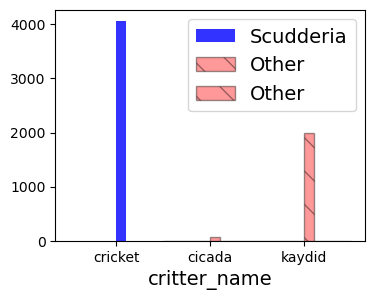

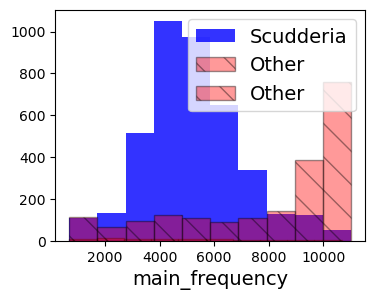

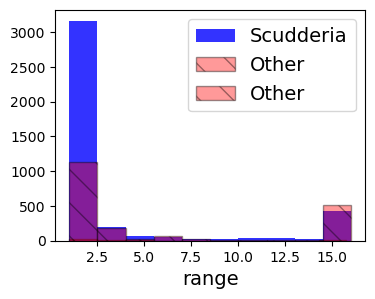

In [25]:
directory = 'E:\chirpfiles\\no_voice_files' #'Small_audio_sample'

data = get_freq_and_range(directory, plot = False, remove_talk = False, sound_range = .3)

for col in data.columns:
    plt.figure(figsize=(4, 3))


    plt.hist(data.loc[data.critter_name=='cricket', col].values,
                color='blue',
                alpha=.8,
                label="Scudderia")

    plt.hist(data.loc[data.critter_name=='cicada', col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Other")

    plt.hist(data.loc[data.critter_name=='kaydid', col].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="Other")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [ ]:
directory = 'Small_audio_sample'
sanity_check(directory, plot = False, remove_talk = True)

cap DB at 200 kb

321    cicada
Name: critter_name, dtype: object
322    cicada
Name: critter_name, dtype: object
323    cicada
Name: critter_name, dtype: object
324    cicada
Name: critter_name, dtype: object
327    cicada
Name: critter_name, dtype: object
332    cricket
Name: critter_name, dtype: object
333    kaydid
Name: critter_name, dtype: object
334    kaydid
Name: critter_name, dtype: object
336    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


337    kaydid
Name: critter_name, dtype: object
339    cricket
Name: critter_name, dtype: object
340    cricket
Name: critter_name, dtype: object
342    cricket
Name: critter_name, dtype: object
350    kaydid
Name: critter_name, dtype: object
351    kaydid
Name: critter_name, dtype: object
354    cricket
Name: critter_name, dtype: object
355    cricket
Name: critter_name, dtype: object
359    kaydid
Name: critter_name, dtype: object
360    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1250
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1680
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1814
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1208
  warnings.warn(


361    kaydid
Name: critter_name, dtype: object
362    kaydid
Name: critter_name, dtype: object
363    cricket
Name: critter_name, dtype: object
365    kaydid
Name: critter_name, dtype: object
366    kaydid
Name: critter_name, dtype: object
376    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1293
  warnings.warn(


377    cricket
Name: critter_name, dtype: object
379    kaydid
Name: critter_name, dtype: object
381    kaydid
Name: critter_name, dtype: object
382    cicada
Name: critter_name, dtype: object
384    cricket
Name: critter_name, dtype: object
387    kaydid
Name: critter_name, dtype: object
388    kaydid
Name: critter_name, dtype: object
390    kaydid
Name: critter_name, dtype: object
391    kaydid
Name: critter_name, dtype: object
392    cricket
Name: critter_name, dtype: object
393    kaydid
Name: critter_name, dtype: object
394    kaydid
Name: critter_name, dtype: object
395    cricket
Name: critter_name, dtype: object
396    kaydid
Name: critter_name, dtype: object
397    kaydid
Name: critter_name, dtype: object
398    kaydid
Name: critter_name, dtype: object
401    kaydid
Name: critter_name, dtype: object
402    kaydid
Name: critter_name, dtype: object
404    kaydid
Name: critter_name, dtype: object
405    kaydid
Name: critter_name, dtype: object
406    kaydid
Name: critter_name, dt

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


453    kaydid
Name: critter_name, dtype: object
454    kaydid
Name: critter_name, dtype: object
455    kaydid
Name: critter_name, dtype: object
456    kaydid
Name: critter_name, dtype: object
457    kaydid
Name: critter_name, dtype: object
458    cricket
Name: critter_name, dtype: object
459    cricket
Name: critter_name, dtype: object
461    cricket
Name: critter_name, dtype: object
462    cricket
Name: critter_name, dtype: object
463    cricket
Name: critter_name, dtype: object
464    cricket
Name: critter_name, dtype: object
467    cricket
Name: critter_name, dtype: object
469    cricket
Name: critter_name, dtype: object
470    cricket
Name: critter_name, dtype: object
471    cricket
Name: critter_name, dtype: object
472    cricket
Name: critter_name, dtype: object
473    cricket
Name: critter_name, dtype: object
474    cricket
Name: critter_name, dtype: object
475    cricket
Name: critter_name, dtype: object
476    cricket
Name: critter_name, dtype: object
477    cricket
Name: crit

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


488    cricket
Name: critter_name, dtype: object
489    cricket
Name: critter_name, dtype: object
490    cricket
Name: critter_name, dtype: object
491    cricket
Name: critter_name, dtype: object
492    cricket
Name: critter_name, dtype: object
494    cricket
Name: critter_name, dtype: object
495    cricket
Name: critter_name, dtype: object
496    cricket
Name: critter_name, dtype: object
497    cricket
Name: critter_name, dtype: object
501    cricket
Name: critter_name, dtype: object
504    cricket
Name: critter_name, dtype: object
505    cricket
Name: critter_name, dtype: object
509    cricket
Name: critter_name, dtype: object
520    cricket
Name: critter_name, dtype: object
526    cricket
Name: critter_name, dtype: object
528    cricket
Name: critter_name, dtype: object
529    cricket
Name: critter_name, dtype: object
532    cricket
Name: critter_name, dtype: object
539    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


544    cricket
Name: critter_name, dtype: object
549    cricket
Name: critter_name, dtype: object
552    cricket
Name: critter_name, dtype: object
553    cricket
Name: critter_name, dtype: object
558    cricket
Name: critter_name, dtype: object
561    cricket
Name: critter_name, dtype: object
562    cricket
Name: critter_name, dtype: object
571    cricket
Name: critter_name, dtype: object
581    cricket
Name: critter_name, dtype: object
585    cricket
Name: critter_name, dtype: object
600    cricket
Name: critter_name, dtype: object
606    cricket
Name: critter_name, dtype: object
608    cricket
Name: critter_name, dtype: object
609    cricket
Name: critter_name, dtype: object
612    cricket
Name: critter_name, dtype: object
614    cricket
Name: critter_name, dtype: object
616    cricket
Name: critter_name, dtype: object
617    cricket
Name: critter_name, dtype: object
619    cricket
Name: critter_name, dtype: object
622    cricket
Name: critter_name, dtype: object
623    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


633    cricket
Name: critter_name, dtype: object
634    cricket
Name: critter_name, dtype: object
643    cricket
Name: critter_name, dtype: object
644    cricket
Name: critter_name, dtype: object
645    cricket
Name: critter_name, dtype: object
646    cricket
Name: critter_name, dtype: object
647    cricket
Name: critter_name, dtype: object
648    cricket
Name: critter_name, dtype: object
649    cricket
Name: critter_name, dtype: object
651    cricket
Name: critter_name, dtype: object
652    cricket
Name: critter_name, dtype: object
653    cricket
Name: critter_name, dtype: object
654    cricket
Name: critter_name, dtype: object
657    cricket
Name: critter_name, dtype: object
659    cricket
Name: critter_name, dtype: object
660    cricket
Name: critter_name, dtype: object
662    cricket
Name: critter_name, dtype: object
663    cricket
Name: critter_name, dtype: object
664    cricket
Name: critter_name, dtype: object
665    cricket
Name: critter_name, dtype: object
666    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


793    cricket
Name: critter_name, dtype: object
794    cricket
Name: critter_name, dtype: object
795    cricket
Name: critter_name, dtype: object
797    cricket
Name: critter_name, dtype: object
798    cricket
Name: critter_name, dtype: object
799    cricket
Name: critter_name, dtype: object
800    cricket
Name: critter_name, dtype: object
801    cricket
Name: critter_name, dtype: object
802    cricket
Name: critter_name, dtype: object
803    cricket
Name: critter_name, dtype: object
805    cricket
Name: critter_name, dtype: object
807    cricket
Name: critter_name, dtype: object
808    cricket
Name: critter_name, dtype: object
809    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


810    cricket
Name: critter_name, dtype: object
812    cricket
Name: critter_name, dtype: object
815    cricket
Name: critter_name, dtype: object
816    cricket
Name: critter_name, dtype: object
817    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


819    cricket
Name: critter_name, dtype: object
820    cricket
Name: critter_name, dtype: object
822    cricket
Name: critter_name, dtype: object
823    cricket
Name: critter_name, dtype: object
827    cricket
Name: critter_name, dtype: object
828    cricket
Name: critter_name, dtype: object
829    cricket
Name: critter_name, dtype: object
833    cricket
Name: critter_name, dtype: object
834    cricket
Name: critter_name, dtype: object
836    cricket
Name: critter_name, dtype: object
839    cricket
Name: critter_name, dtype: object
841    cricket
Name: critter_name, dtype: object
843    cricket
Name: critter_name, dtype: object
844    cricket
Name: critter_name, dtype: object
845    cricket
Name: critter_name, dtype: object
846    cricket
Name: critter_name, dtype: object
847    cricket
Name: critter_name, dtype: object
848    cricket
Name: critter_name, dtype: object
849    cricket
Name: critter_name, dtype: object
850    cricket
Name: critter_name, dtype: object
851    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


888    cricket
Name: critter_name, dtype: object
890    cricket
Name: critter_name, dtype: object
891    cricket
Name: critter_name, dtype: object
893    cricket
Name: critter_name, dtype: object
894    cricket
Name: critter_name, dtype: object
896    cricket
Name: critter_name, dtype: object
897    cricket
Name: critter_name, dtype: object
898    cricket
Name: critter_name, dtype: object
899    cricket
Name: critter_name, dtype: object
900    cricket
Name: critter_name, dtype: object
901    cricket
Name: critter_name, dtype: object
902    cricket
Name: critter_name, dtype: object
907    cricket
Name: critter_name, dtype: object
909    cricket
Name: critter_name, dtype: object
910    cricket
Name: critter_name, dtype: object
911    cricket
Name: critter_name, dtype: object
912    cricket
Name: critter_name, dtype: object
913    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


914    cricket
Name: critter_name, dtype: object
915    cricket
Name: critter_name, dtype: object
916    cricket
Name: critter_name, dtype: object
917    cricket
Name: critter_name, dtype: object
921    cricket
Name: critter_name, dtype: object
922    cricket
Name: critter_name, dtype: object
923    cricket
Name: critter_name, dtype: object
924    cricket
Name: critter_name, dtype: object
925    cricket
Name: critter_name, dtype: object
926    cricket
Name: critter_name, dtype: object
927    cricket
Name: critter_name, dtype: object
928    cricket
Name: critter_name, dtype: object
929    cricket
Name: critter_name, dtype: object
930    cricket
Name: critter_name, dtype: object
932    cricket
Name: critter_name, dtype: object
933    cricket
Name: critter_name, dtype: object
935    cricket
Name: critter_name, dtype: object
939    cricket
Name: critter_name, dtype: object
940    cricket
Name: critter_name, dtype: object
941    cricket
Name: critter_name, dtype: object
942    cricket
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


990    cricket
Name: critter_name, dtype: object
991    cricket
Name: critter_name, dtype: object
992    cricket
Name: critter_name, dtype: object
997    cricket
Name: critter_name, dtype: object
1009    cricket
Name: critter_name, dtype: object
1017    cricket
Name: critter_name, dtype: object
1019    cricket
Name: critter_name, dtype: object
1020    cricket
Name: critter_name, dtype: object
1022    cricket
Name: critter_name, dtype: object
1025    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1028    cricket
Name: critter_name, dtype: object
1030    cricket
Name: critter_name, dtype: object
1031    cricket
Name: critter_name, dtype: object
1035    cricket
Name: critter_name, dtype: object
1036    cricket
Name: critter_name, dtype: object
1040    kaydid
Name: critter_name, dtype: object
1041    cricket
Name: critter_name, dtype: object
1042    kaydid
Name: critter_name, dtype: object
1044    cricket
Name: critter_name, dtype: object
1045    cricket
Name: critter_name, dtype: object
1047    cricket
Name: critter_name, dtype: object
1048    cricket
Name: critter_name, dtype: object
1049    kaydid
Name: critter_name, dtype: object
1050    cricket
Name: critter_name, dtype: object
1052    cricket
Name: critter_name, dtype: object
1055    cricket
Name: critter_name, dtype: object
1056    cricket
Name: critter_name, dtype: object
1058    cricket
Name: critter_name, dtype: object
1059    cricket
Name: critter_name, dtype: object
1060    cricket
Name: critter_name, dtype: object
106

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1166    cricket
Name: critter_name, dtype: object
1167    cricket
Name: critter_name, dtype: object
1168    cricket
Name: critter_name, dtype: object
1169    cricket
Name: critter_name, dtype: object
1170    cricket
Name: critter_name, dtype: object
1171    cricket
Name: critter_name, dtype: object
1172    cricket
Name: critter_name, dtype: object
1173    cricket
Name: critter_name, dtype: object
1174    cricket
Name: critter_name, dtype: object
1175    cricket
Name: critter_name, dtype: object
1177    cricket
Name: critter_name, dtype: object
1178    cricket
Name: critter_name, dtype: object
1179    cricket
Name: critter_name, dtype: object
1180    kaydid
Name: critter_name, dtype: object
1181    kaydid
Name: critter_name, dtype: object
1182    kaydid
Name: critter_name, dtype: object
1183    kaydid
Name: critter_name, dtype: object
1184    cricket
Name: critter_name, dtype: object
1185    kaydid
Name: critter_name, dtype: object
1186    kaydid
Name: critter_name, dtype: object
1187  

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1188    cricket
Name: critter_name, dtype: object
1189    cricket
Name: critter_name, dtype: object
1191    cricket
Name: critter_name, dtype: object
1192    cricket
Name: critter_name, dtype: object
1193    cricket
Name: critter_name, dtype: object
1194    cricket
Name: critter_name, dtype: object
1197    cricket
Name: critter_name, dtype: object
1200    cricket
Name: critter_name, dtype: object
1201    cricket
Name: critter_name, dtype: object
1202    cricket
Name: critter_name, dtype: object
1205    cricket
Name: critter_name, dtype: object
1206    kaydid
Name: critter_name, dtype: object
1207    cricket
Name: critter_name, dtype: object
1210    cricket
Name: critter_name, dtype: object
1212    cricket
Name: critter_name, dtype: object
1213    cricket
Name: critter_name, dtype: object
1215    cricket
Name: critter_name, dtype: object
1218    cricket
Name: critter_name, dtype: object
1219    cricket
Name: critter_name, dtype: object
1220    cricket
Name: critter_name, dtype: object
1

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1419    kaydid
Name: critter_name, dtype: object
1420    kaydid
Name: critter_name, dtype: object
1421    kaydid
Name: critter_name, dtype: object
1422    kaydid
Name: critter_name, dtype: object
1423    kaydid
Name: critter_name, dtype: object
1424    kaydid
Name: critter_name, dtype: object
1425    kaydid
Name: critter_name, dtype: object
1426    kaydid
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


1427    kaydid
Name: critter_name, dtype: object
1428    kaydid
Name: critter_name, dtype: object
1429    kaydid
Name: critter_name, dtype: object
1430    kaydid
Name: critter_name, dtype: object
1431    kaydid
Name: critter_name, dtype: object
1432    kaydid
Name: critter_name, dtype: object
1433    kaydid
Name: critter_name, dtype: object
1434    kaydid
Name: critter_name, dtype: object
1435    kaydid
Name: critter_name, dtype: object
1437    kaydid
Name: critter_name, dtype: object
1438    kaydid
Name: critter_name, dtype: object
1439    kaydid
Name: critter_name, dtype: object
1440    kaydid
Name: critter_name, dtype: object
1441    kaydid
Name: critter_name, dtype: object
1442    kaydid
Name: critter_name, dtype: object
1443    kaydid
Name: critter_name, dtype: object
1444    kaydid
Name: critter_name, dtype: object
1445    kaydid
Name: critter_name, dtype: object
1446    kaydid
Name: critter_name, dtype: object
1447    kaydid
Name: critter_name, dtype: object
1448    kaydid
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1513    kaydid
Name: critter_name, dtype: object
1514    kaydid
Name: critter_name, dtype: object
1515    kaydid
Name: critter_name, dtype: object
1516    kaydid
Name: critter_name, dtype: object
1517    kaydid
Name: critter_name, dtype: object
1520    kaydid
Name: critter_name, dtype: object
1522    kaydid
Name: critter_name, dtype: object
1523    kaydid
Name: critter_name, dtype: object
1524    kaydid
Name: critter_name, dtype: object
1525    kaydid
Name: critter_name, dtype: object
1526    kaydid
Name: critter_name, dtype: object
1527    kaydid
Name: critter_name, dtype: object
1528    kaydid
Name: critter_name, dtype: object
1529    kaydid
Name: critter_name, dtype: object
1530    kaydid
Name: critter_name, dtype: object
1531    kaydid
Name: critter_name, dtype: object
1532    kaydid
Name: critter_name, dtype: object
1534    kaydid
Name: critter_name, dtype: object
1535    kaydid
Name: critter_name, dtype: object
1536    kaydid
Name: critter_name, dtype: object
1540    kaydid
Name:

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


1579    kaydid
Name: critter_name, dtype: object
1580    kaydid
Name: critter_name, dtype: object
1581    kaydid
Name: critter_name, dtype: object
1582    kaydid
Name: critter_name, dtype: object
1583    kaydid
Name: critter_name, dtype: object
1585    kaydid
Name: critter_name, dtype: object
1586    kaydid
Name: critter_name, dtype: object
1587    kaydid
Name: critter_name, dtype: object
1588    kaydid
Name: critter_name, dtype: object
1589    kaydid
Name: critter_name, dtype: object
1590    kaydid
Name: critter_name, dtype: object
1591    kaydid
Name: critter_name, dtype: object
1592    kaydid
Name: critter_name, dtype: object
1593    kaydid
Name: critter_name, dtype: object
1594    kaydid
Name: critter_name, dtype: object
1595    kaydid
Name: critter_name, dtype: object
1596    kaydid
Name: critter_name, dtype: object
1598    kaydid
Name: critter_name, dtype: object
1599    kaydid
Name: critter_name, dtype: object
1600    kaydid
Name: critter_name, dtype: object
1602    kaydid
Name:

1821    kaydid
Name: critter_name, dtype: object
1822    kaydid
Name: critter_name, dtype: object
1823    kaydid
Name: critter_name, dtype: object
1824    kaydid
Name: critter_name, dtype: object
1825    kaydid
Name: critter_name, dtype: object
1826    kaydid
Name: critter_name, dtype: object
1827    kaydid
Name: critter_name, dtype: object
1828    kaydid
Name: critter_name, dtype: object
1829    kaydid
Name: critter_name, dtype: object
1830    kaydid
Name: critter_name, dtype: object
1831    kaydid
Name: critter_name, dtype: object
1832    kaydid
Name: critter_name, dtype: object
1833    kaydid
Name: critter_name, dtype: object
1834    kaydid
Name: critter_name, dtype: object
1835    kaydid
Name: critter_name, dtype: object
1836    kaydid
Name: critter_name, dtype: object
1837    kaydid
Name: critter_name, dtype: object
1838    kaydid
Name: critter_name, dtype: object
1839    kaydid
Name: critter_name, dtype: object
1840    kaydid
Name: critter_name, dtype: object
1841    kaydid
Name:

2048    kaydid
Name: critter_name, dtype: object
2049    kaydid
Name: critter_name, dtype: object
2052    kaydid
Name: critter_name, dtype: object
2053    kaydid
Name: critter_name, dtype: object
2054    kaydid
Name: critter_name, dtype: object
2055    kaydid
Name: critter_name, dtype: object
2056    kaydid
Name: critter_name, dtype: object
2057    kaydid
Name: critter_name, dtype: object
2058    kaydid
Name: critter_name, dtype: object
2059    kaydid
Name: critter_name, dtype: object
2060    kaydid
Name: critter_name, dtype: object
2061    kaydid
Name: critter_name, dtype: object
2062    kaydid
Name: critter_name, dtype: object
2064    kaydid
Name: critter_name, dtype: object
2066    kaydid
Name: critter_name, dtype: object
2067    kaydid
Name: critter_name, dtype: object
2068    kaydid
Name: critter_name, dtype: object
2075    cricket
Name: critter_name, dtype: object
2076    cricket
Name: critter_name, dtype: object
2079    cricket
Name: critter_name, dtype: object
2080    cricket
N

2314    cricket
Name: critter_name, dtype: object
2315    cricket
Name: critter_name, dtype: object
2316    cricket
Name: critter_name, dtype: object
2317    cricket
Name: critter_name, dtype: object
2318    cricket
Name: critter_name, dtype: object
2319    cricket
Name: critter_name, dtype: object
2320    cricket
Name: critter_name, dtype: object
2321    cricket
Name: critter_name, dtype: object
2322    cricket
Name: critter_name, dtype: object
2323    cricket
Name: critter_name, dtype: object
2324    cricket
Name: critter_name, dtype: object
2325    cricket
Name: critter_name, dtype: object
2328    cricket
Name: critter_name, dtype: object
2329    cricket
Name: critter_name, dtype: object
2330    cricket
Name: critter_name, dtype: object
2331    cricket
Name: critter_name, dtype: object
2332    cricket
Name: critter_name, dtype: object
2333    cricket
Name: critter_name, dtype: object
2334    cricket
Name: critter_name, dtype: object
2337    cricket
Name: critter_name, dtype: object


2551    cricket
Name: critter_name, dtype: object
2552    cricket
Name: critter_name, dtype: object
2559    cricket
Name: critter_name, dtype: object
2568    cricket
Name: critter_name, dtype: object
2570    cricket
Name: critter_name, dtype: object
2571    cricket
Name: critter_name, dtype: object
2574    cricket
Name: critter_name, dtype: object
2575    cricket
Name: critter_name, dtype: object
2576    cricket
Name: critter_name, dtype: object
2581    cricket
Name: critter_name, dtype: object
2582    cricket
Name: critter_name, dtype: object
2584    cricket
Name: critter_name, dtype: object
2585    cricket
Name: critter_name, dtype: object
2586    cricket
Name: critter_name, dtype: object
2587    cricket
Name: critter_name, dtype: object
2588    cricket
Name: critter_name, dtype: object
2589    cricket
Name: critter_name, dtype: object
2590    cricket
Name: critter_name, dtype: object
2591    cricket
Name: critter_name, dtype: object
2593    cricket
Name: critter_name, dtype: object


2811    cricket
Name: critter_name, dtype: object
2813    cricket
Name: critter_name, dtype: object
2814    cricket
Name: critter_name, dtype: object
2815    cricket
Name: critter_name, dtype: object
2818    cricket
Name: critter_name, dtype: object
2819    cricket
Name: critter_name, dtype: object
2821    cricket
Name: critter_name, dtype: object
2822    cricket
Name: critter_name, dtype: object
2824    cricket
Name: critter_name, dtype: object
2825    cricket
Name: critter_name, dtype: object
2826    cricket
Name: critter_name, dtype: object
2827    cricket
Name: critter_name, dtype: object
2830    cricket
Name: critter_name, dtype: object
2834    cricket
Name: critter_name, dtype: object
2835    cricket
Name: critter_name, dtype: object
2837    cricket
Name: critter_name, dtype: object
2839    cricket
Name: critter_name, dtype: object
2840    cricket
Name: critter_name, dtype: object
2841    cricket
Name: critter_name, dtype: object
2843    cricket
Name: critter_name, dtype: object


3048    kaydid
Name: critter_name, dtype: object
3049    kaydid
Name: critter_name, dtype: object
3050    kaydid
Name: critter_name, dtype: object
3051    kaydid
Name: critter_name, dtype: object
3052    kaydid
Name: critter_name, dtype: object
3053    kaydid
Name: critter_name, dtype: object
3054    kaydid
Name: critter_name, dtype: object
3056    kaydid
Name: critter_name, dtype: object
3057    kaydid
Name: critter_name, dtype: object
3058    kaydid
Name: critter_name, dtype: object
3059    kaydid
Name: critter_name, dtype: object
3060    kaydid
Name: critter_name, dtype: object
3062    kaydid
Name: critter_name, dtype: object
3063    kaydid
Name: critter_name, dtype: object
3065    kaydid
Name: critter_name, dtype: object
3066    kaydid
Name: critter_name, dtype: object
3067    kaydid
Name: critter_name, dtype: object
3068    kaydid
Name: critter_name, dtype: object
3069    kaydid
Name: critter_name, dtype: object
3070    kaydid
Name: critter_name, dtype: object
3071    kaydid
Name:

3299    cricket
Name: critter_name, dtype: object
3300    cricket
Name: critter_name, dtype: object
3303    cricket
Name: critter_name, dtype: object
3304    cricket
Name: critter_name, dtype: object
3305    cricket
Name: critter_name, dtype: object
3306    cricket
Name: critter_name, dtype: object
3309    cricket
Name: critter_name, dtype: object
3311    cricket
Name: critter_name, dtype: object
3315    cricket
Name: critter_name, dtype: object
3317    cricket
Name: critter_name, dtype: object
3322    cricket
Name: critter_name, dtype: object
3323    cricket
Name: critter_name, dtype: object
3325    cricket
Name: critter_name, dtype: object
3326    cricket
Name: critter_name, dtype: object
3327    cricket
Name: critter_name, dtype: object
3330    cricket
Name: critter_name, dtype: object
3332    cricket
Name: critter_name, dtype: object
3333    cricket
Name: critter_name, dtype: object
3335    cricket
Name: critter_name, dtype: object
3336    cricket
Name: critter_name, dtype: object


3584    cricket
Name: critter_name, dtype: object
3585    cricket
Name: critter_name, dtype: object
3586    cricket
Name: critter_name, dtype: object
3587    cricket
Name: critter_name, dtype: object
3588    cricket
Name: critter_name, dtype: object
3589    cricket
Name: critter_name, dtype: object
3590    cricket
Name: critter_name, dtype: object
3591    cricket
Name: critter_name, dtype: object
3592    cricket
Name: critter_name, dtype: object
3593    cricket
Name: critter_name, dtype: object
3595    cricket
Name: critter_name, dtype: object
3596    cricket
Name: critter_name, dtype: object
3597    cricket
Name: critter_name, dtype: object
3598    cricket
Name: critter_name, dtype: object
3599    cricket
Name: critter_name, dtype: object
3600    cricket
Name: critter_name, dtype: object
3602    cricket
Name: critter_name, dtype: object
3605    cricket
Name: critter_name, dtype: object
3606    cricket
Name: critter_name, dtype: object
3607    cricket
Name: critter_name, dtype: object


3840    kaydid
Name: critter_name, dtype: object
3841    kaydid
Name: critter_name, dtype: object
3842    kaydid
Name: critter_name, dtype: object
3843    kaydid
Name: critter_name, dtype: object
3844    kaydid
Name: critter_name, dtype: object
3845    kaydid
Name: critter_name, dtype: object
3846    kaydid
Name: critter_name, dtype: object
3847    kaydid
Name: critter_name, dtype: object
3848    kaydid
Name: critter_name, dtype: object
3849    kaydid
Name: critter_name, dtype: object
3850    kaydid
Name: critter_name, dtype: object
3851    kaydid
Name: critter_name, dtype: object
3852    kaydid
Name: critter_name, dtype: object
3853    kaydid
Name: critter_name, dtype: object
3854    kaydid
Name: critter_name, dtype: object
3855    kaydid
Name: critter_name, dtype: object
3856    kaydid
Name: critter_name, dtype: object
3857    kaydid
Name: critter_name, dtype: object
3858    kaydid
Name: critter_name, dtype: object
3860    kaydid
Name: critter_name, dtype: object
3861    kaydid
Name:

4128    kaydid
Name: critter_name, dtype: object
4129    kaydid
Name: critter_name, dtype: object
4130    kaydid
Name: critter_name, dtype: object
4131    cricket
Name: critter_name, dtype: object
4135    kaydid
Name: critter_name, dtype: object
4136    cricket
Name: critter_name, dtype: object
4139    kaydid
Name: critter_name, dtype: object
4140    kaydid
Name: critter_name, dtype: object
4141    cricket
Name: critter_name, dtype: object
4142    cricket
Name: critter_name, dtype: object
4143    cricket
Name: critter_name, dtype: object
4144    cricket
Name: critter_name, dtype: object
4146    cricket
Name: critter_name, dtype: object
4149    cricket
Name: critter_name, dtype: object
4150    cricket
Name: critter_name, dtype: object
4152    cricket
Name: critter_name, dtype: object
4153    kaydid
Name: critter_name, dtype: object
4159    cricket
Name: critter_name, dtype: object
4161    cricket
Name: critter_name, dtype: object
4162    kaydid
Name: critter_name, dtype: object
4166    

4431    cricket
Name: critter_name, dtype: object
4432    cricket
Name: critter_name, dtype: object
4433    kaydid
Name: critter_name, dtype: object
4434    kaydid
Name: critter_name, dtype: object
4435    cricket
Name: critter_name, dtype: object
4436    kaydid
Name: critter_name, dtype: object
4440    kaydid
Name: critter_name, dtype: object
4441    kaydid
Name: critter_name, dtype: object
4442    kaydid
Name: critter_name, dtype: object
4443    kaydid
Name: critter_name, dtype: object
4444    kaydid
Name: critter_name, dtype: object
4445    cricket
Name: critter_name, dtype: object
4446    cricket
Name: critter_name, dtype: object
4447    kaydid
Name: critter_name, dtype: object
4449    kaydid
Name: critter_name, dtype: object
4450    cricket
Name: critter_name, dtype: object
4454    kaydid
Name: critter_name, dtype: object
4455    kaydid
Name: critter_name, dtype: object
4460    cricket
Name: critter_name, dtype: object
4462    cricket
Name: critter_name, dtype: object
4463    kayd

4689    cricket
Name: critter_name, dtype: object
4690    kaydid
Name: critter_name, dtype: object
4693    kaydid
Name: critter_name, dtype: object
4694    kaydid
Name: critter_name, dtype: object
4696    kaydid
Name: critter_name, dtype: object
4697    kaydid
Name: critter_name, dtype: object
4698    kaydid
Name: critter_name, dtype: object
4699    kaydid
Name: critter_name, dtype: object
4700    kaydid
Name: critter_name, dtype: object
4701    kaydid
Name: critter_name, dtype: object
4702    cricket
Name: critter_name, dtype: object
4703    kaydid
Name: critter_name, dtype: object
4704    kaydid
Name: critter_name, dtype: object
4705    kaydid
Name: critter_name, dtype: object
4707    kaydid
Name: critter_name, dtype: object
4709    kaydid
Name: critter_name, dtype: object
4710    kaydid
Name: critter_name, dtype: object
4711    kaydid
Name: critter_name, dtype: object
4712    kaydid
Name: critter_name, dtype: object
4713    kaydid
Name: critter_name, dtype: object
4714    kaydid
Nam

4962    kaydid
Name: critter_name, dtype: object
4963    kaydid
Name: critter_name, dtype: object
4964    kaydid
Name: critter_name, dtype: object
4970    cricket
Name: critter_name, dtype: object
4971    cricket
Name: critter_name, dtype: object
4980    cricket
Name: critter_name, dtype: object
4982    cricket
Name: critter_name, dtype: object
4983    cricket
Name: critter_name, dtype: object
4984    cricket
Name: critter_name, dtype: object
4985    kaydid
Name: critter_name, dtype: object
4986    cricket
Name: critter_name, dtype: object
4987    cricket
Name: critter_name, dtype: object
4988    cricket
Name: critter_name, dtype: object
4989    cricket
Name: critter_name, dtype: object
4990    cricket
Name: critter_name, dtype: object
4991    cricket
Name: critter_name, dtype: object
4996    cricket
Name: critter_name, dtype: object
4997    cricket
Name: critter_name, dtype: object
4998    cricket
Name: critter_name, dtype: object
4999    cricket
Name: critter_name, dtype: object
5000

5211    cricket
Name: critter_name, dtype: object
5212    cricket
Name: critter_name, dtype: object
5213    cricket
Name: critter_name, dtype: object
5214    cricket
Name: critter_name, dtype: object
5218    kaydid
Name: critter_name, dtype: object
5219    cricket
Name: critter_name, dtype: object
5224    cricket
Name: critter_name, dtype: object
5225    cricket
Name: critter_name, dtype: object
5227    cricket
Name: critter_name, dtype: object
5230    cricket
Name: critter_name, dtype: object
5231    cricket
Name: critter_name, dtype: object
5232    cricket
Name: critter_name, dtype: object
5233    cricket
Name: critter_name, dtype: object
5234    cricket
Name: critter_name, dtype: object
5235    kaydid
Name: critter_name, dtype: object
5236    cricket
Name: critter_name, dtype: object
5237    kaydid
Name: critter_name, dtype: object
5238    cricket
Name: critter_name, dtype: object
5239    kaydid
Name: critter_name, dtype: object
5240    cricket
Name: critter_name, dtype: object
5241

5447    kaydid
Name: critter_name, dtype: object
5448    kaydid
Name: critter_name, dtype: object
5449    kaydid
Name: critter_name, dtype: object
5450    kaydid
Name: critter_name, dtype: object
5451    kaydid
Name: critter_name, dtype: object
5452    kaydid
Name: critter_name, dtype: object
5453    kaydid
Name: critter_name, dtype: object
5454    kaydid
Name: critter_name, dtype: object
5456    kaydid
Name: critter_name, dtype: object
5457    kaydid
Name: critter_name, dtype: object
5458    kaydid
Name: critter_name, dtype: object
5460    kaydid
Name: critter_name, dtype: object
5462    kaydid
Name: critter_name, dtype: object
5463    cricket
Name: critter_name, dtype: object
5464    cricket
Name: critter_name, dtype: object
5465    kaydid
Name: critter_name, dtype: object
5466    kaydid
Name: critter_name, dtype: object
5468    cricket
Name: critter_name, dtype: object
5469    cricket
Name: critter_name, dtype: object
5471    kaydid
Name: critter_name, dtype: object
5473    kaydid
N

5682    kaydid
Name: critter_name, dtype: object
5684    kaydid
Name: critter_name, dtype: object
5685    cricket
Name: critter_name, dtype: object
5686    cricket
Name: critter_name, dtype: object
5688    cricket
Name: critter_name, dtype: object
5689    cricket
Name: critter_name, dtype: object
5690    cricket
Name: critter_name, dtype: object
5693    cricket
Name: critter_name, dtype: object
5694    cricket
Name: critter_name, dtype: object
5697    cricket
Name: critter_name, dtype: object
5699    cricket
Name: critter_name, dtype: object
5700    cricket
Name: critter_name, dtype: object
5701    cricket
Name: critter_name, dtype: object
5702    cricket
Name: critter_name, dtype: object
5703    cricket
Name: critter_name, dtype: object
5704    cricket
Name: critter_name, dtype: object
5705    cricket
Name: critter_name, dtype: object
5707    cricket
Name: critter_name, dtype: object
5709    cricket
Name: critter_name, dtype: object
5711    cricket
Name: critter_name, dtype: object
57

5977    cricket
Name: critter_name, dtype: object
5978    cricket
Name: critter_name, dtype: object
5979    cricket
Name: critter_name, dtype: object
5981    cricket
Name: critter_name, dtype: object
5984    cricket
Name: critter_name, dtype: object
5985    cricket
Name: critter_name, dtype: object
5986    cricket
Name: critter_name, dtype: object
5989    cricket
Name: critter_name, dtype: object
5991    cricket
Name: critter_name, dtype: object
5994    cricket
Name: critter_name, dtype: object
5996    cricket
Name: critter_name, dtype: object
5997    cricket
Name: critter_name, dtype: object
5998    cricket
Name: critter_name, dtype: object
6002    cricket
Name: critter_name, dtype: object
6003    kaydid
Name: critter_name, dtype: object
6004    kaydid
Name: critter_name, dtype: object
6005    cricket
Name: critter_name, dtype: object
6009    cricket
Name: critter_name, dtype: object
6012    kaydid
Name: critter_name, dtype: object
6014    kaydid
Name: critter_name, dtype: object
6018

6282    kaydid
Name: critter_name, dtype: object
6283    kaydid
Name: critter_name, dtype: object
6284    cricket
Name: critter_name, dtype: object
6286    kaydid
Name: critter_name, dtype: object
6287    kaydid
Name: critter_name, dtype: object
6290    cricket
Name: critter_name, dtype: object
6292    kaydid
Name: critter_name, dtype: object
6293    kaydid
Name: critter_name, dtype: object
6294    cricket
Name: critter_name, dtype: object
6295    kaydid
Name: critter_name, dtype: object
6297    cricket
Name: critter_name, dtype: object
6298    cricket
Name: critter_name, dtype: object
6299    cricket
Name: critter_name, dtype: object
6300    kaydid
Name: critter_name, dtype: object
6301    kaydid
Name: critter_name, dtype: object
6303    kaydid
Name: critter_name, dtype: object
6304    kaydid
Name: critter_name, dtype: object
6305    kaydid
Name: critter_name, dtype: object
6306    kaydid
Name: critter_name, dtype: object
6307    cricket
Name: critter_name, dtype: object
6308    kaydi

6512    kaydid
Name: critter_name, dtype: object
6513    kaydid
Name: critter_name, dtype: object
6516    cricket
Name: critter_name, dtype: object
6518    cricket
Name: critter_name, dtype: object
6519    kaydid
Name: critter_name, dtype: object
6520    cricket
Name: critter_name, dtype: object
6521    cricket
Name: critter_name, dtype: object
6522    cricket
Name: critter_name, dtype: object
6523    kaydid
Name: critter_name, dtype: object
6524    cricket
Name: critter_name, dtype: object
6525    cricket
Name: critter_name, dtype: object
6526    cricket
Name: critter_name, dtype: object
6528    cricket
Name: critter_name, dtype: object
6530    cricket
Name: critter_name, dtype: object
6532    cricket
Name: critter_name, dtype: object
6534    cricket
Name: critter_name, dtype: object
6535    cricket
Name: critter_name, dtype: object
6536    cricket
Name: critter_name, dtype: object
6537    cricket
Name: critter_name, dtype: object
6538    kaydid
Name: critter_name, dtype: object
6539 

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


6552    cricket
Name: critter_name, dtype: object
6554    cricket
Name: critter_name, dtype: object
6555    cricket
Name: critter_name, dtype: object
6557    cricket
Name: critter_name, dtype: object
6558    cricket
Name: critter_name, dtype: object
6559    cricket
Name: critter_name, dtype: object
6560    kaydid
Name: critter_name, dtype: object
6561    kaydid
Name: critter_name, dtype: object
6562    kaydid
Name: critter_name, dtype: object
6563    kaydid
Name: critter_name, dtype: object
6564    cricket
Name: critter_name, dtype: object
6565    cricket
Name: critter_name, dtype: object
6566    cricket
Name: critter_name, dtype: object
6568    cricket
Name: critter_name, dtype: object
6570    kaydid
Name: critter_name, dtype: object
6571    cricket
Name: critter_name, dtype: object
6572    kaydid
Name: critter_name, dtype: object
6573    kaydid
Name: critter_name, dtype: object
6574    cricket
Name: critter_name, dtype: object
6575    cricket
Name: critter_name, dtype: object
6577   

6810    cricket
Name: critter_name, dtype: object
6811    cricket
Name: critter_name, dtype: object
6812    cricket
Name: critter_name, dtype: object
6813    kaydid
Name: critter_name, dtype: object
6814    kaydid
Name: critter_name, dtype: object
6815    kaydid
Name: critter_name, dtype: object
6816    kaydid
Name: critter_name, dtype: object
6817    kaydid
Name: critter_name, dtype: object
6818    kaydid
Name: critter_name, dtype: object
6819    kaydid
Name: critter_name, dtype: object
6820    kaydid
Name: critter_name, dtype: object
6821    kaydid
Name: critter_name, dtype: object
6823    cricket
Name: critter_name, dtype: object
6826    cricket
Name: critter_name, dtype: object
6827    kaydid
Name: critter_name, dtype: object
6828    kaydid
Name: critter_name, dtype: object
6829    cricket
Name: critter_name, dtype: object
6830    kaydid
Name: critter_name, dtype: object
6831    cricket
Name: critter_name, dtype: object
6833    kaydid
Name: critter_name, dtype: object
6834    crick

7090    cricket
Name: critter_name, dtype: object
7093    cricket
Name: critter_name, dtype: object
7094    cricket
Name: critter_name, dtype: object
7095    kaydid
Name: critter_name, dtype: object
7098    cricket
Name: critter_name, dtype: object
7100    cricket
Name: critter_name, dtype: object
7106    cricket
Name: critter_name, dtype: object
7107    cricket
Name: critter_name, dtype: object
7108    cricket
Name: critter_name, dtype: object
7109    cricket
Name: critter_name, dtype: object
7112    cricket
Name: critter_name, dtype: object
7113    cricket
Name: critter_name, dtype: object
7114    cricket
Name: critter_name, dtype: object
7115    cricket
Name: critter_name, dtype: object
7116    cricket
Name: critter_name, dtype: object
7118    cricket
Name: critter_name, dtype: object
7119    cricket
Name: critter_name, dtype: object
7120    cricket
Name: critter_name, dtype: object
7121    cricket
Name: critter_name, dtype: object
7129    cricket
Name: critter_name, dtype: object
7

7365    cricket
Name: critter_name, dtype: object
7367    cricket
Name: critter_name, dtype: object
7368    cricket
Name: critter_name, dtype: object
7369    cricket
Name: critter_name, dtype: object
7370    cricket
Name: critter_name, dtype: object
7371    cricket
Name: critter_name, dtype: object
7372    cricket
Name: critter_name, dtype: object
7377    cricket
Name: critter_name, dtype: object
7384    kaydid
Name: critter_name, dtype: object
7385    cricket
Name: critter_name, dtype: object
7386    cricket
Name: critter_name, dtype: object
7387    cricket
Name: critter_name, dtype: object
7388    cricket
Name: critter_name, dtype: object
7393    cricket
Name: critter_name, dtype: object
7395    cricket
Name: critter_name, dtype: object
7397    cricket
Name: critter_name, dtype: object
7398    kaydid
Name: critter_name, dtype: object
7399    cricket
Name: critter_name, dtype: object
7400    kaydid
Name: critter_name, dtype: object
7401    cricket
Name: critter_name, dtype: object
740

7815    cricket
Name: critter_name, dtype: object
7816    cricket
Name: critter_name, dtype: object
7817    cricket
Name: critter_name, dtype: object
7823    cricket
Name: critter_name, dtype: object
7824    cricket
Name: critter_name, dtype: object
7826    cricket
Name: critter_name, dtype: object
7827    cricket
Name: critter_name, dtype: object
7828    cricket
Name: critter_name, dtype: object
7833    cricket
Name: critter_name, dtype: object
7835    cricket
Name: critter_name, dtype: object
7836    cricket
Name: critter_name, dtype: object
7846    cricket
Name: critter_name, dtype: object
7847    cricket
Name: critter_name, dtype: object
7848    cricket
Name: critter_name, dtype: object
7851    cricket
Name: critter_name, dtype: object
7852    cricket
Name: critter_name, dtype: object
7853    cricket
Name: critter_name, dtype: object
7857    cricket
Name: critter_name, dtype: object
7859    cricket
Name: critter_name, dtype: object
7860    cricket
Name: critter_name, dtype: object


8164    cricket
Name: critter_name, dtype: object
8165    cricket
Name: critter_name, dtype: object
8167    cricket
Name: critter_name, dtype: object
8168    cricket
Name: critter_name, dtype: object
8169    cricket
Name: critter_name, dtype: object
8170    cricket
Name: critter_name, dtype: object
8171    cricket
Name: critter_name, dtype: object
8176    cricket
Name: critter_name, dtype: object
8178    cricket
Name: critter_name, dtype: object
8180    cricket
Name: critter_name, dtype: object
8181    cricket
Name: critter_name, dtype: object
8182    cricket
Name: critter_name, dtype: object
8183    cricket
Name: critter_name, dtype: object
8184    cricket
Name: critter_name, dtype: object
8185    cricket
Name: critter_name, dtype: object
8186    cricket
Name: critter_name, dtype: object
8187    cricket
Name: critter_name, dtype: object
8189    cricket
Name: critter_name, dtype: object
8190    cricket
Name: critter_name, dtype: object
8191    cricket
Name: critter_name, dtype: object


8386    cricket
Name: critter_name, dtype: object
8387    cricket
Name: critter_name, dtype: object
8392    cricket
Name: critter_name, dtype: object
8393    cricket
Name: critter_name, dtype: object
8394    cricket
Name: critter_name, dtype: object
8395    cricket
Name: critter_name, dtype: object
8396    cricket
Name: critter_name, dtype: object
8397    cricket
Name: critter_name, dtype: object
8398    cricket
Name: critter_name, dtype: object
8399    cricket
Name: critter_name, dtype: object
8400    cricket
Name: critter_name, dtype: object
8401    cricket
Name: critter_name, dtype: object
8402    cricket
Name: critter_name, dtype: object
8403    cricket
Name: critter_name, dtype: object
8404    cricket
Name: critter_name, dtype: object
8405    cricket
Name: critter_name, dtype: object
8406    cricket
Name: critter_name, dtype: object
8407    cricket
Name: critter_name, dtype: object
8409    cricket
Name: critter_name, dtype: object
8410    cricket
Name: critter_name, dtype: object


8636    cricket
Name: critter_name, dtype: object
8637    cricket
Name: critter_name, dtype: object
8638    cricket
Name: critter_name, dtype: object
8640    cricket
Name: critter_name, dtype: object
8644    cricket
Name: critter_name, dtype: object
8645    cricket
Name: critter_name, dtype: object
8646    cricket
Name: critter_name, dtype: object
8647    cricket
Name: critter_name, dtype: object
8648    cricket
Name: critter_name, dtype: object
8650    cricket
Name: critter_name, dtype: object
8653    cricket
Name: critter_name, dtype: object
8655    cricket
Name: critter_name, dtype: object
8656    cricket
Name: critter_name, dtype: object
8658    cricket
Name: critter_name, dtype: object
8659    cricket
Name: critter_name, dtype: object
8660    cricket
Name: critter_name, dtype: object
8661    cricket
Name: critter_name, dtype: object
8663    cricket
Name: critter_name, dtype: object
8664    cricket
Name: critter_name, dtype: object
8665    cricket
Name: critter_name, dtype: object


8850    cricket
Name: critter_name, dtype: object
8851    cricket
Name: critter_name, dtype: object
8852    cricket
Name: critter_name, dtype: object
8853    cricket
Name: critter_name, dtype: object
8854    cricket
Name: critter_name, dtype: object
8855    cricket
Name: critter_name, dtype: object
8857    cricket
Name: critter_name, dtype: object
8859    cricket
Name: critter_name, dtype: object
8860    cricket
Name: critter_name, dtype: object
8863    cricket
Name: critter_name, dtype: object
8864    cricket
Name: critter_name, dtype: object
8865    cricket
Name: critter_name, dtype: object
8866    cricket
Name: critter_name, dtype: object
8867    cricket
Name: critter_name, dtype: object
8868    cricket
Name: critter_name, dtype: object
8870    cricket
Name: critter_name, dtype: object
8871    cricket
Name: critter_name, dtype: object
8874    cricket
Name: critter_name, dtype: object
8875    cricket
Name: critter_name, dtype: object
8876    cricket
Name: critter_name, dtype: object


9088    cricket
Name: critter_name, dtype: object
9090    cricket
Name: critter_name, dtype: object
9091    cricket
Name: critter_name, dtype: object
9092    cricket
Name: critter_name, dtype: object
9094    cricket
Name: critter_name, dtype: object
9095    cricket
Name: critter_name, dtype: object
9097    cricket
Name: critter_name, dtype: object
9098    cricket
Name: critter_name, dtype: object
9099    cricket
Name: critter_name, dtype: object
9100    cricket
Name: critter_name, dtype: object
9101    cricket
Name: critter_name, dtype: object
9102    cricket
Name: critter_name, dtype: object
9103    cricket
Name: critter_name, dtype: object
9104    cricket
Name: critter_name, dtype: object
9105    cricket
Name: critter_name, dtype: object
9106    cricket
Name: critter_name, dtype: object
9108    cricket
Name: critter_name, dtype: object
9110    cricket
Name: critter_name, dtype: object
9112    cricket
Name: critter_name, dtype: object
9113    cricket
Name: critter_name, dtype: object


9330    cricket
Name: critter_name, dtype: object
9342    cricket
Name: critter_name, dtype: object
9350    cricket
Name: critter_name, dtype: object
9353    cricket
Name: critter_name, dtype: object
9361    cricket
Name: critter_name, dtype: object
9372    cricket
Name: critter_name, dtype: object
9377    cricket
Name: critter_name, dtype: object
9379    kaydid
Name: critter_name, dtype: object
9383    cricket
Name: critter_name, dtype: object
9390    cricket
Name: critter_name, dtype: object
9394    cricket
Name: critter_name, dtype: object
9403    cricket
Name: critter_name, dtype: object
9404    cricket
Name: critter_name, dtype: object
9406    cricket
Name: critter_name, dtype: object
9410    cricket
Name: critter_name, dtype: object
9426    cricket
Name: critter_name, dtype: object
9427    cricket
Name: critter_name, dtype: object
9432    cricket
Name: critter_name, dtype: object
9449    cricket
Name: critter_name, dtype: object
9456    cricket
Name: critter_name, dtype: object
9

11192    cricket
Name: critter_name, dtype: object
11274    cricket
Name: critter_name, dtype: object
11320    kaydid
Name: critter_name, dtype: object
11334    cricket
Name: critter_name, dtype: object
11339    cricket
Name: critter_name, dtype: object
11368    cricket
Name: critter_name, dtype: object
11387    cricket
Name: critter_name, dtype: object
11390    cricket
Name: critter_name, dtype: object
11406    cricket
Name: critter_name, dtype: object
11418    cricket
Name: critter_name, dtype: object
11422    cricket
Name: critter_name, dtype: object
11468    cricket
Name: critter_name, dtype: object
11470    cricket
Name: critter_name, dtype: object
11477    cricket
Name: critter_name, dtype: object
11487    cricket
Name: critter_name, dtype: object
11488    cricket
Name: critter_name, dtype: object
11503    cricket
Name: critter_name, dtype: object
11531    cricket
Name: critter_name, dtype: object
11537    cricket
Name: critter_name, dtype: object
11538    cricket
Name: critter_n

13236    kaydid
Name: critter_name, dtype: object
47    cricket
Name: critter_name, dtype: object
48    cricket
Name: critter_name, dtype: object
50    cricket
Name: critter_name, dtype: object
51    cricket
Name: critter_name, dtype: object
54    cicada
Name: critter_name, dtype: object
70    cicada
Name: critter_name, dtype: object
71    cicada
Name: critter_name, dtype: object
72    cicada
Name: critter_name, dtype: object
73    cicada
Name: critter_name, dtype: object
74    cicada
Name: critter_name, dtype: object
75    cicada
Name: critter_name, dtype: object
76    kaydid
Name: critter_name, dtype: object
77    kaydid
Name: critter_name, dtype: object
78    kaydid
Name: critter_name, dtype: object
79    kaydid
Name: critter_name, dtype: object
81    cricket
Name: critter_name, dtype: object
82    kaydid
Name: critter_name, dtype: object
83    cricket
Name: critter_name, dtype: object
84    kaydid
Name: critter_name, dtype: object
86    cricket
Name: critter_name, dtype: object
88 

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


194    kaydid
Name: critter_name, dtype: object
196    kaydid
Name: critter_name, dtype: object
199    cricket
Name: critter_name, dtype: object
200    cricket
Name: critter_name, dtype: object
201    kaydid
Name: critter_name, dtype: object
202    cricket
Name: critter_name, dtype: object
203    cricket
Name: critter_name, dtype: object
206    kaydid
Name: critter_name, dtype: object
207    kaydid
Name: critter_name, dtype: object
208    kaydid
Name: critter_name, dtype: object
210    kaydid
Name: critter_name, dtype: object
211    kaydid
Name: critter_name, dtype: object
212    kaydid
Name: critter_name, dtype: object
216    kaydid
Name: critter_name, dtype: object
218    kaydid
Name: critter_name, dtype: object
219    cricket
Name: critter_name, dtype: object


C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


220    cricket
Name: critter_name, dtype: object
221    cricket
Name: critter_name, dtype: object
224    kaydid
Name: critter_name, dtype: object
225    kaydid
Name: critter_name, dtype: object
226    kaydid
Name: critter_name, dtype: object
228    kaydid
Name: critter_name, dtype: object
229    kaydid
Name: critter_name, dtype: object
230    kaydid
Name: critter_name, dtype: object
231    kaydid
Name: critter_name, dtype: object
232    kaydid
Name: critter_name, dtype: object
233    cricket
Name: critter_name, dtype: object
234    cricket
Name: critter_name, dtype: object
235    kaydid
Name: critter_name, dtype: object
236    kaydid
Name: critter_name, dtype: object
237    kaydid
Name: critter_name, dtype: object
240    kaydid
Name: critter_name, dtype: object
241    kaydid
Name: critter_name, dtype: object
242    kaydid
Name: critter_name, dtype: object
243    kaydid
Name: critter_name, dtype: object
244    kaydid
Name: critter_name, dtype: object
246    kaydid
Name: critter_name, dt

C:\Users\sarah\anaconda3\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(


276    cricket
Name: critter_name, dtype: object
277    cricket
Name: critter_name, dtype: object
278    cricket
Name: critter_name, dtype: object
280    cricket
Name: critter_name, dtype: object
282    kaydid
Name: critter_name, dtype: object
287    cricket
Name: critter_name, dtype: object
288    cricket
Name: critter_name, dtype: object
289    cricket
Name: critter_name, dtype: object
290    cricket
Name: critter_name, dtype: object
292    kaydid
Name: critter_name, dtype: object
294    kaydid
Name: critter_name, dtype: object
296    cricket
Name: critter_name, dtype: object
297    cricket
Name: critter_name, dtype: object
298    cricket
Name: critter_name, dtype: object
299    cricket
Name: critter_name, dtype: object
300    cricket
Name: critter_name, dtype: object
301    cricket
Name: critter_name, dtype: object
302    cricket
Name: critter_name, dtype: object
303    cricket
Name: critter_name, dtype: object
304    kaydid
Name: critter_name, dtype: object
305    kaydid
Name: crit

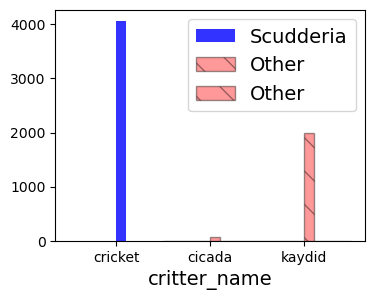

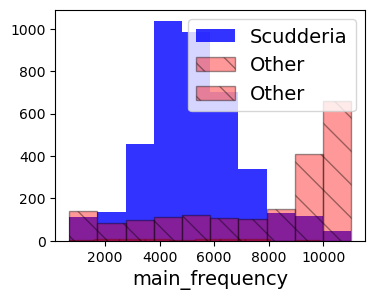

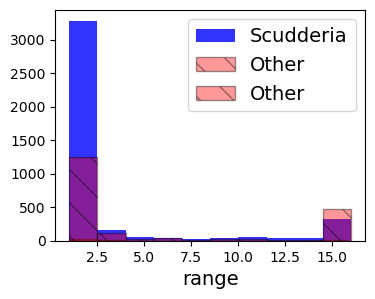

In [22]:
directory = 'E:\chirpfiles\\no_voice_files' #'Small_audio_sample'

data = get_freq_and_range(directory, plot = False, remove_talk = False, sound_range = .3)

for col in data.columns:
    plt.figure(figsize=(4, 3))


    plt.hist(data.loc[data.critter_name=='cricket', col].values,
                color='blue',
                alpha=.8,
                label="Scudderia")

    plt.hist(data.loc[data.critter_name=='cicada', col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Other")

    plt.hist(data.loc[data.critter_name=='kaydid', col].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="Other")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

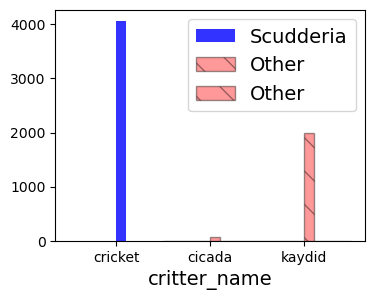

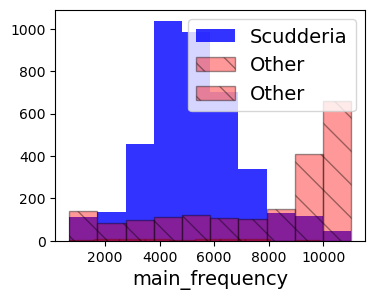

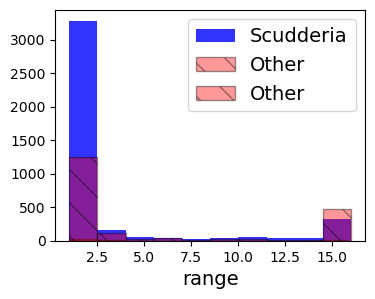

In [23]:
for col in data.columns:
    plt.figure(figsize=(4, 3))


    plt.hist(data.loc[data.critter_name=='cricket', col].values,
                color='blue',
                alpha=.8,
                label="Scudderia")

    plt.hist(data.loc[data.critter_name=='cicada', col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Other")

    plt.hist(data.loc[data.critter_name=='kaydid', col].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="Other")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()